In [67]:
import requests, time
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [69]:
api = KaggleApi()
api.authenticate()

In [70]:
# CORRECT IMPORT
import zipfile

# Initialize and authenticate
api = KaggleApi()
api.authenticate()

# Download dataset - use the correct identifier from Kaggle URL
# Format: "username/dataset-name"
dataset = "jesusandrade1/alcohol-sales-from-usa-company"
api.dataset_download_files(dataset, path="./", unzip=True)

# Now you can read the CSV files


Dataset URL: https://www.kaggle.com/datasets/jesusandrade1/alcohol-sales-from-usa-company


In [71]:
df = pd.read_csv("CSV\Alcohol sales.csv") 
print(df.head())

       date       brand      sales
0  04/10/21  Producto 1     $87.94
1  04/10/21  Producto 2    $260.15
2  04/10/21  Producto 3    $176.41
3  04/10/21  Producto 4    $239.88
4  04/10/21  Producto 5  $2,098.09


In [72]:
df.dtypes

date     object
brand    object
sales    object
dtype: object

In [73]:
df['sales'] = df['sales'].str.replace('$', '', regex=False)
df['sales'] = df['sales'].str.replace(',', '', regex=False)
df['sales'] = df['sales'].astype(float)

In [74]:
df['date'] = pd.to_datetime(df['date'])


=== VALORES FALTANTES POR COLUMNA ===
Empty DataFrame
Columns: [Cantidad_Faltantes, Porcentaje_Faltantes]
Index: []

=== FILAS COMPLETAMENTE VACÍAS ===
Total: 0


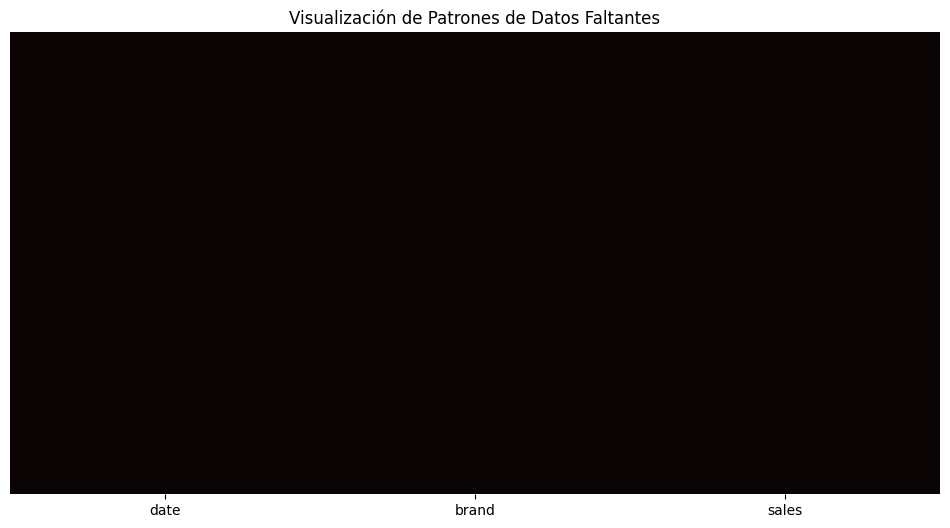

In [75]:
# Calcular valores faltantes por columna
resumen_faltantes = pd.DataFrame({
    'Cantidad_Faltantes': df.isnull().sum(),
    'Porcentaje_Faltantes': (df.isnull().sum() / len(df)) * 100
}).sort_values('Porcentaje_Faltantes', ascending=False)

print("=== VALORES FALTANTES POR COLUMNA ===")
print(resumen_faltantes[resumen_faltantes['Cantidad_Faltantes'] > 0])

# Verificar filas completamente vacías
print(f"\n=== FILAS COMPLETAMENTE VACÍAS ===")
print(f"Total: {df.isnull().all(axis=1).sum()}")

# Mapa de calor para visualizar patrones de datos faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="mako", yticklabels=False)
plt.title('Visualización de Patrones de Datos Faltantes')
plt.show()

In [76]:
import numpy as np

In [77]:
# Fecha de inicio de la campaña
campaign_start = pd.Timestamp('2023-01-10')

df['Campaign'] = np.where(
    df['date'] < campaign_start,
    'Antes',
    'Después'
)

campaign_counts = df['Campaign'].value_counts()
print(f"\nDistribución de la campaña:\n{campaign_counts}")


Distribución de la campaña:
Campaign
Antes      7514
Después    3430
Name: count, dtype: int64


In [78]:
df['month'] = df['date'].dt.month

def get_season(month):
    # Asignar estación según el mes
    if month in [12, 1, 2]:
        return 'Invierno'
    elif month in [3, 4, 5]:
        return 'Primavera'
    elif month in [6, 7, 8]:
        return 'Verano'
    elif month in [9, 10, 11]:
        return 'Otoño'

df['season'] = df['month'].apply(get_season)

# Crear columna de día de la semana (1=Lunes, 7=Domingo)
df['day_of_week'] = df['date'].dt.dayofweek + 1
df['day_of_week'].astype('Int16')

0        6
1        6
2        6
3        6
4        6
        ..
10939    5
10940    5
10941    5
10942    5
10943    5
Name: day_of_week, Length: 10944, dtype: Int16

In [79]:
df.dtypes

date           datetime64[ns]
brand                  object
sales                 float64
Campaign               object
month                   int32
season                 object
day_of_week             int32
dtype: object

In [80]:
Cat_cols = ['brand', 'Campaign', 'month', 'season']
Num_cols = ['sales', 'date','day_of_week']
chosen_cat = 'Campaign'

In [81]:
top_7_brands = df.groupby('brand')['sales'].sum().nlargest(7).index

df_top_7 = df[df['brand'].isin(top_7_brands)]

df_top_7.head()

date        brand    sales Campaign  month     season  day_of_week
4  2021-04-10   Producto 5  2098.09    Antes      4  Primavera            6
5  2021-04-10   Producto 6  2341.76    Antes      4  Primavera            6
6  2021-04-10   Producto 7   792.51    Antes      4  Primavera            6
8  2021-04-10   Producto 9  2771.14    Antes      4  Primavera            6
13 2021-04-10  Producto 14  1704.43    Antes      4  Primavera            6

# CAT vs CAT

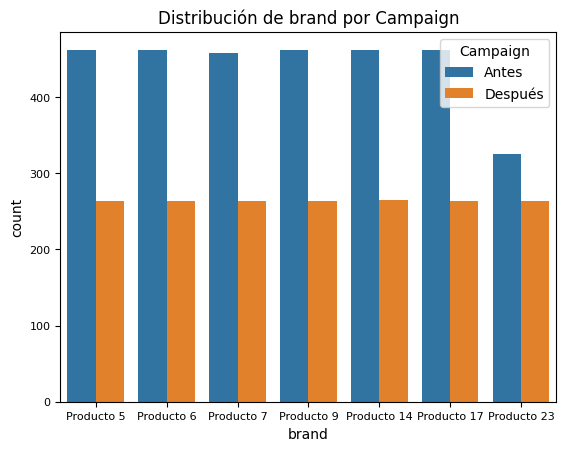

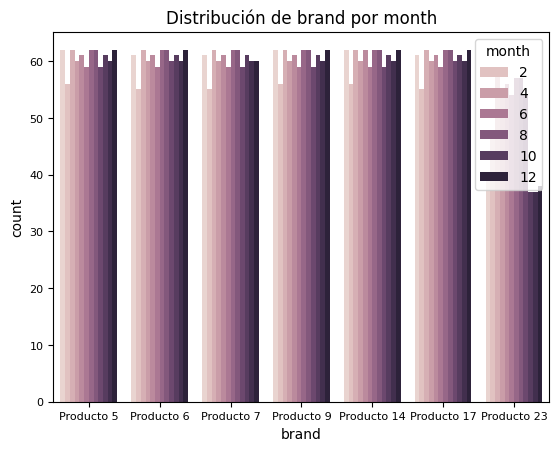

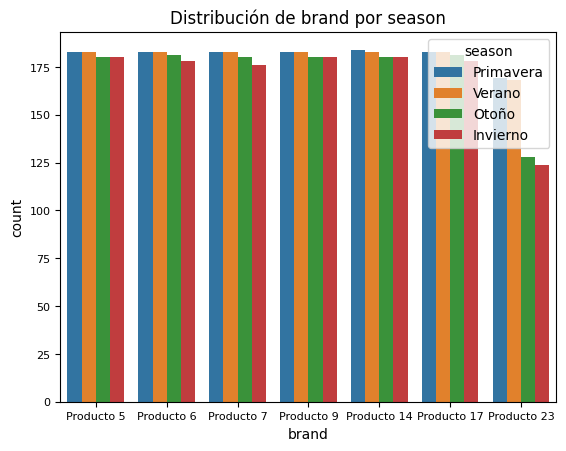

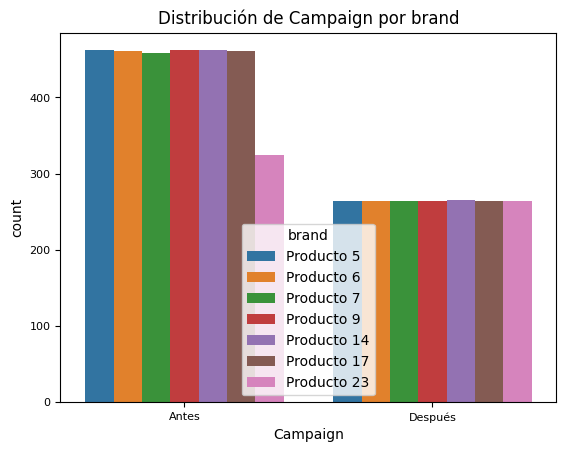

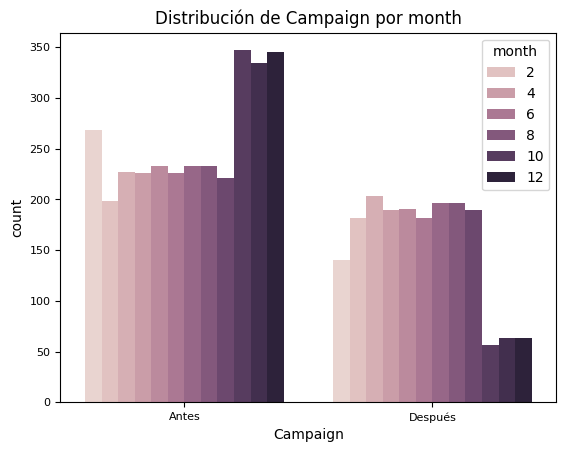

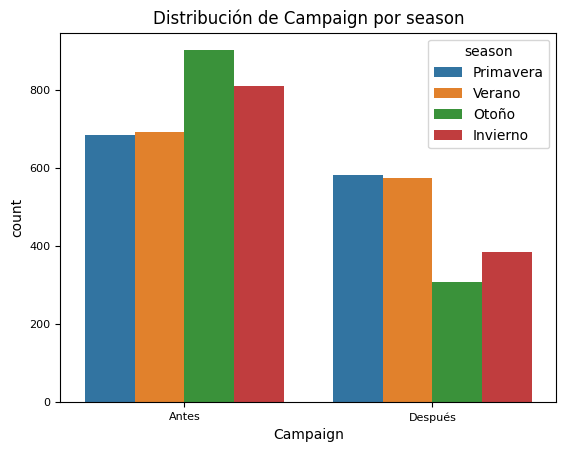

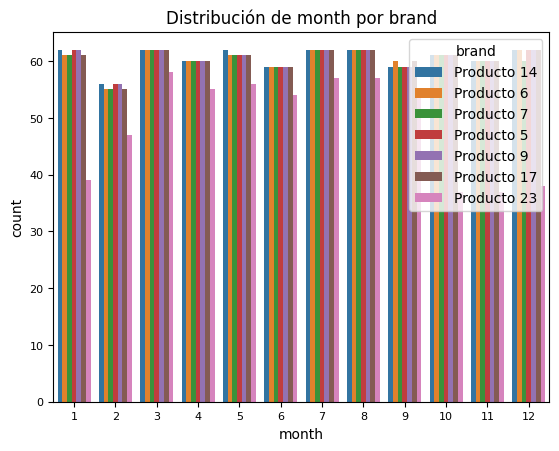

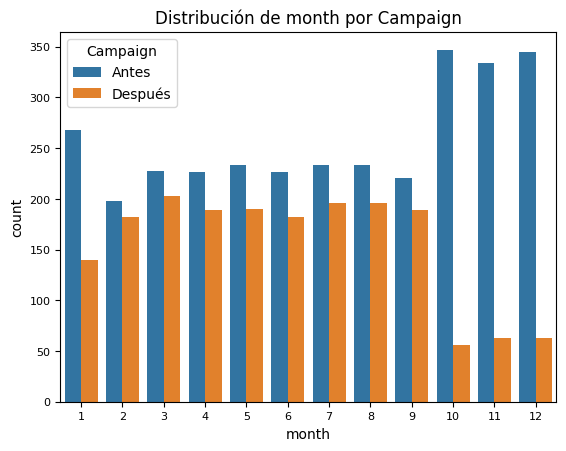

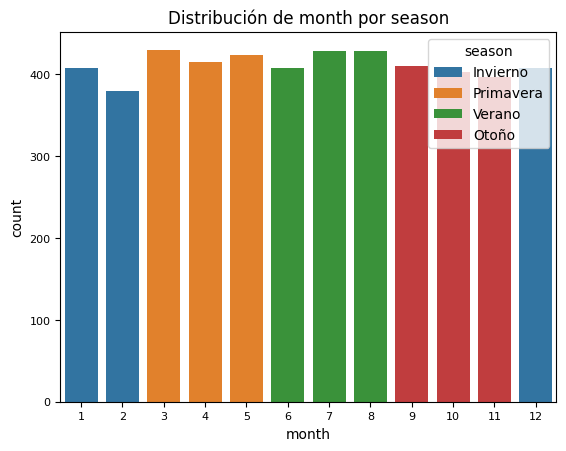

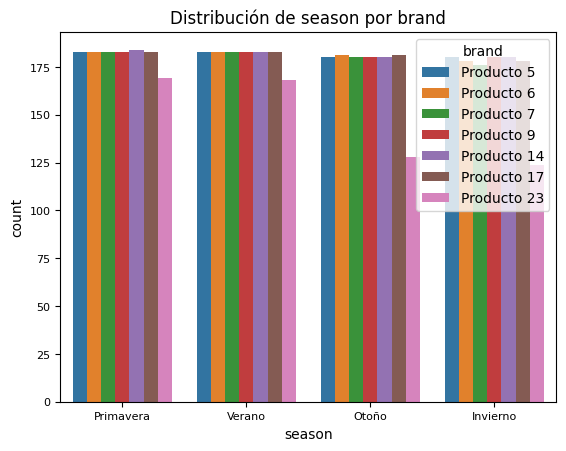

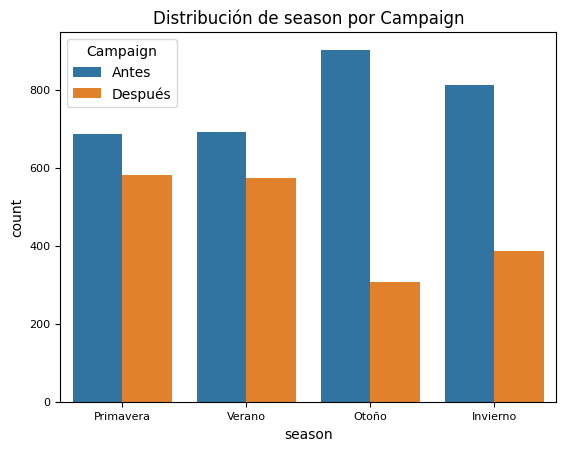

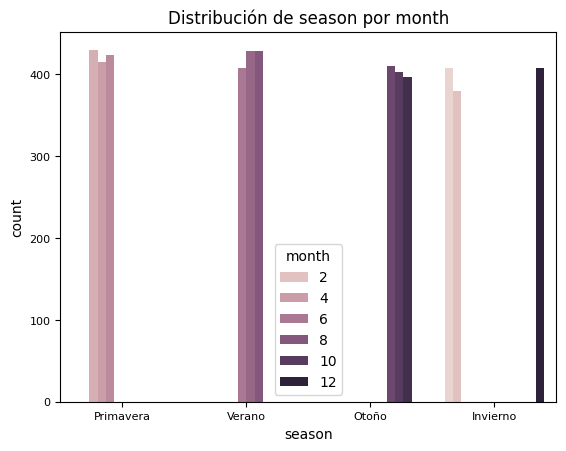

In [82]:
for rows in Cat_cols:
    for col in Cat_cols:
        if rows == col:
            continue
        sns.countplot(data=df_top_7, x=rows, hue=col)
        plt.tick_params(axis='both', which='major', labelsize=8)
        plt.title(f'Distribución de {rows} por {col}')
        
        plt.show()

## Cat VS num

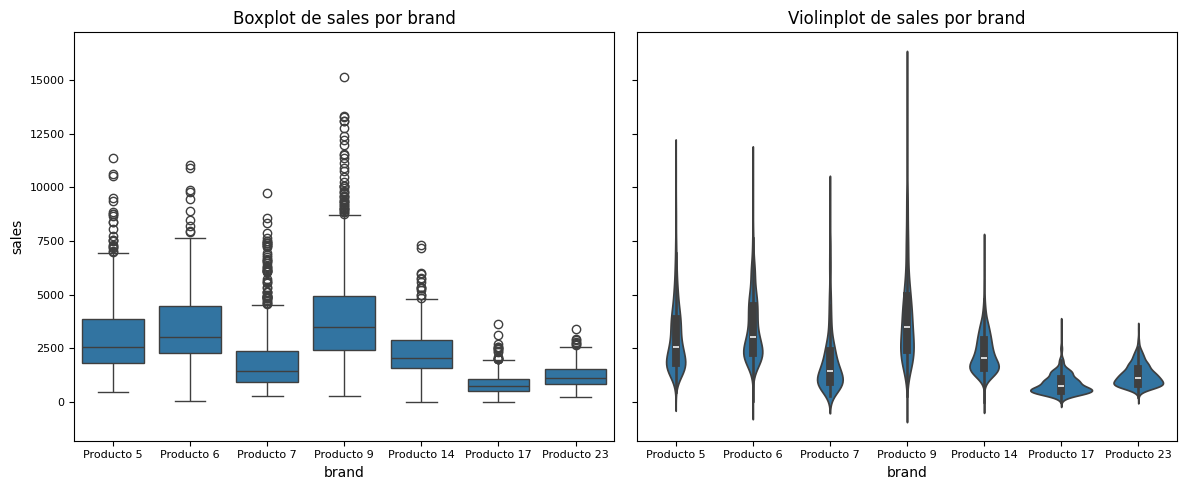

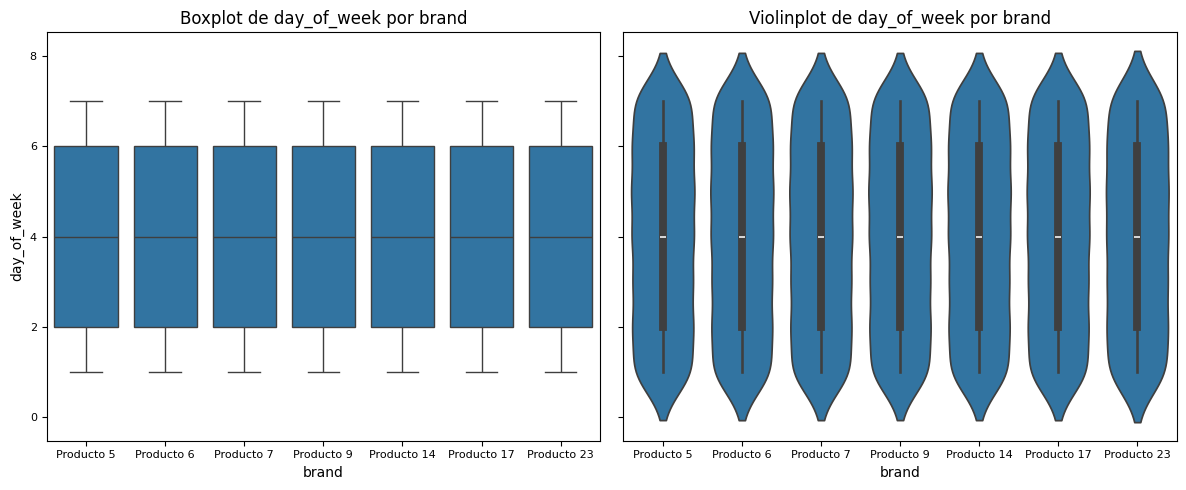

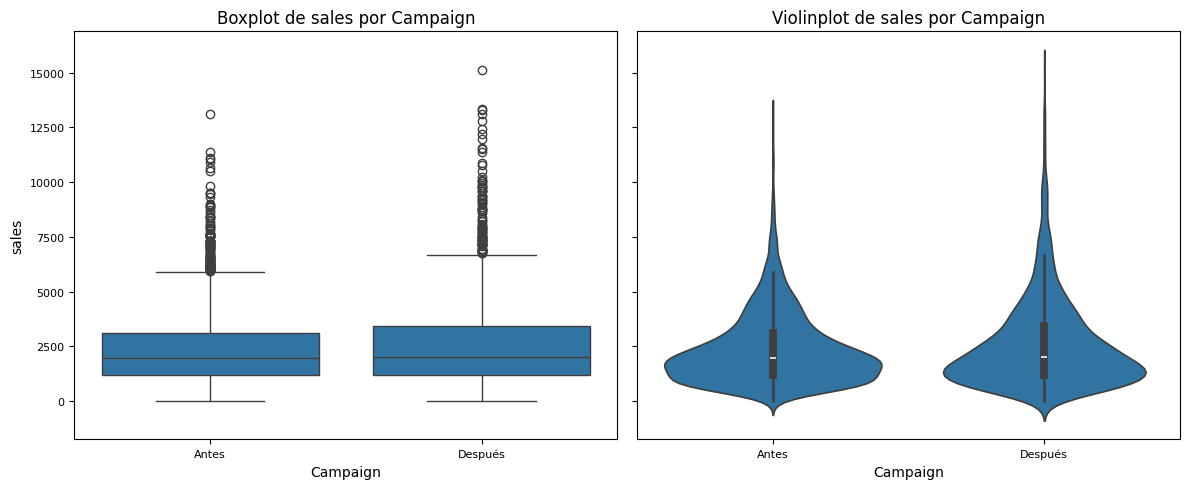

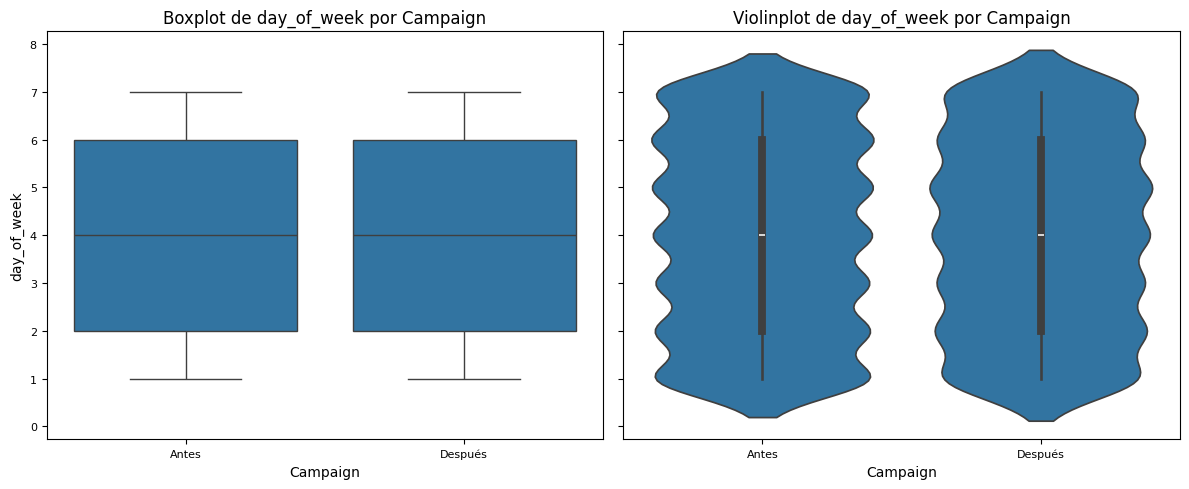

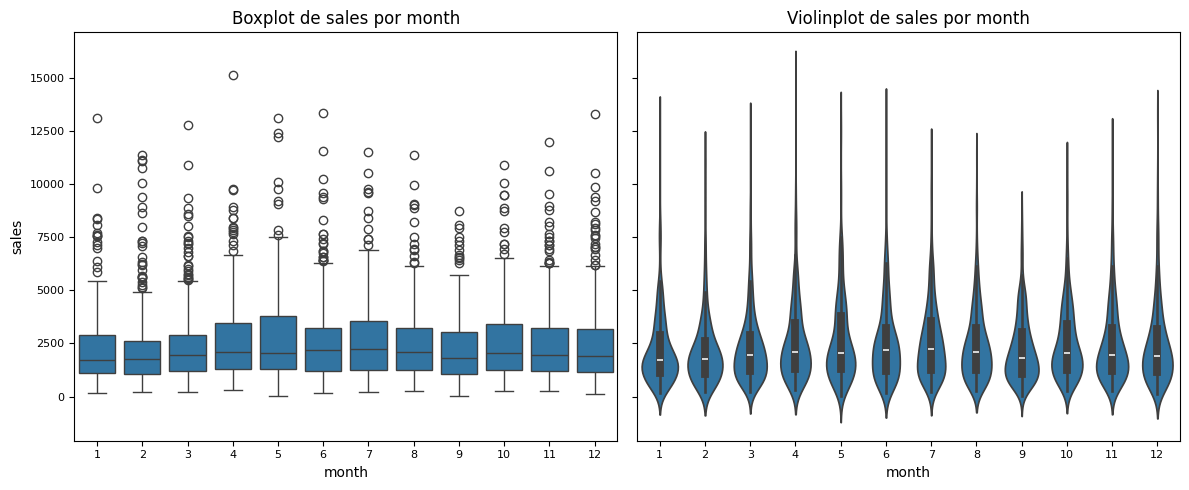

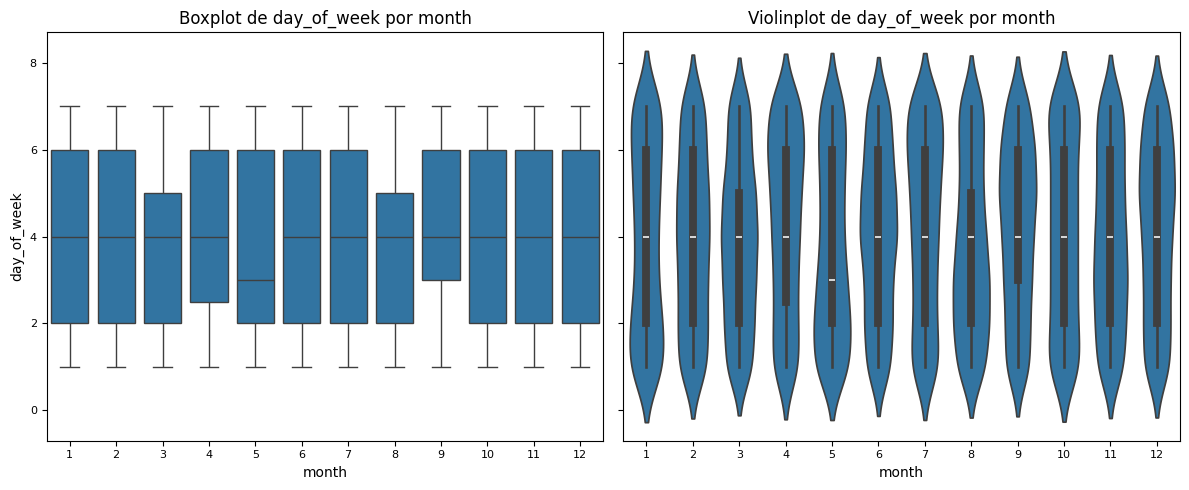

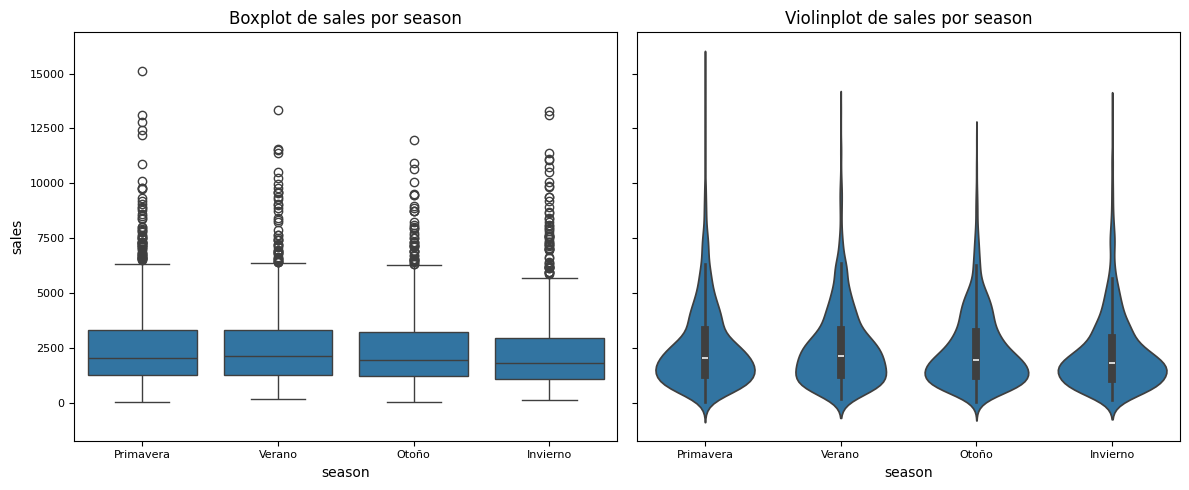

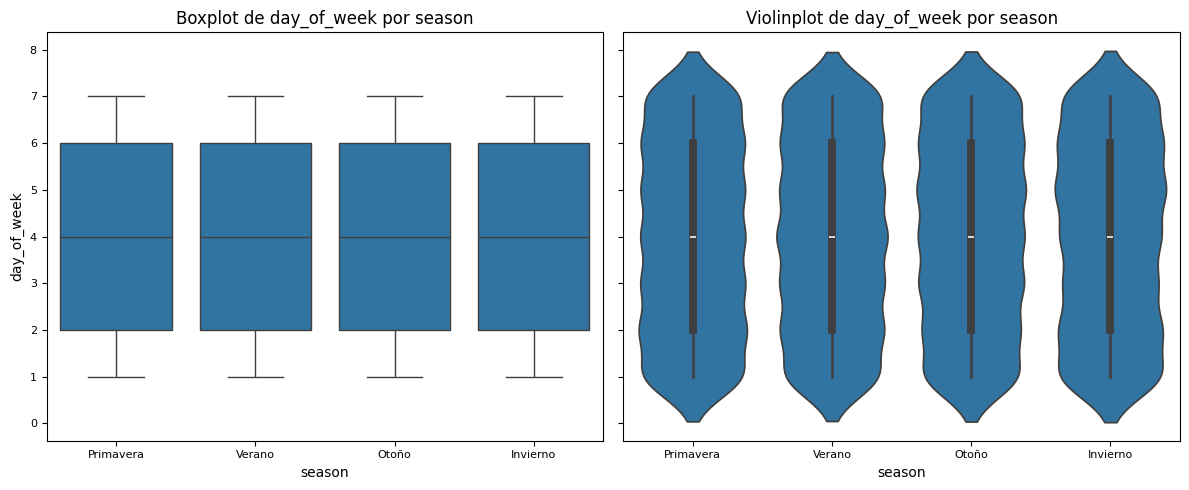

In [83]:
for cat in Cat_cols:
    for num in Num_cols:
        if num == 'date':
            continue
        fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

        # Boxplot
        sns.boxplot(data=df_top_7, x=cat, y=num, ax=axes[0])
        axes[0].set_title(f"Boxplot de {num} por {cat}")
        axes[0].tick_params(axis='both', which='major', labelsize=8)
        
        # Violinplot
        sns.violinplot(data=df_top_7, x=cat, y=num, ax=axes[1])
        axes[1].set_title(f"Violinplot de {num} por {cat}")
        axes[1].tick_params(axis='both', which='major', labelsize=8)

        plt.tight_layout()
        plt.show()

# Num VS Num

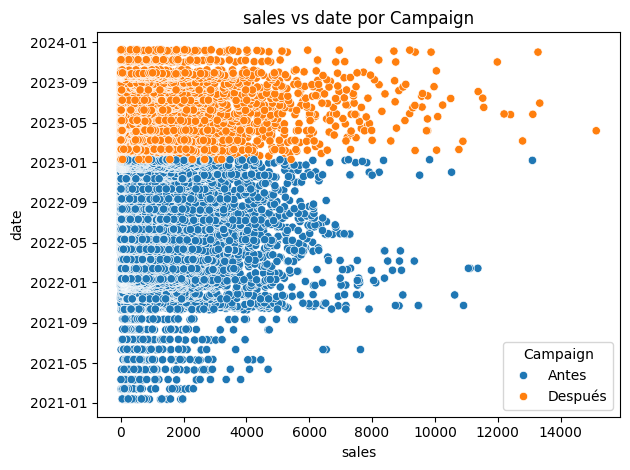

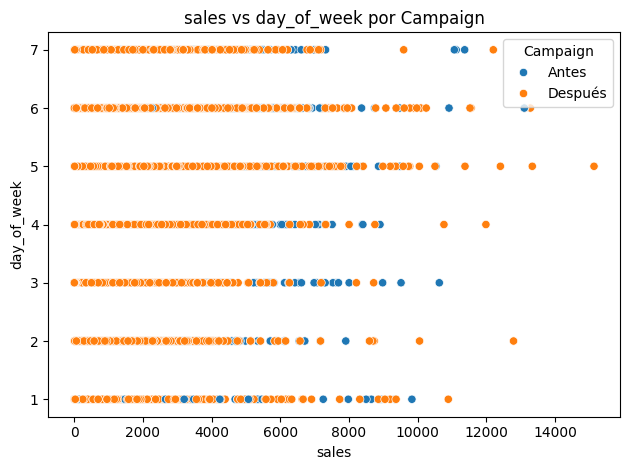

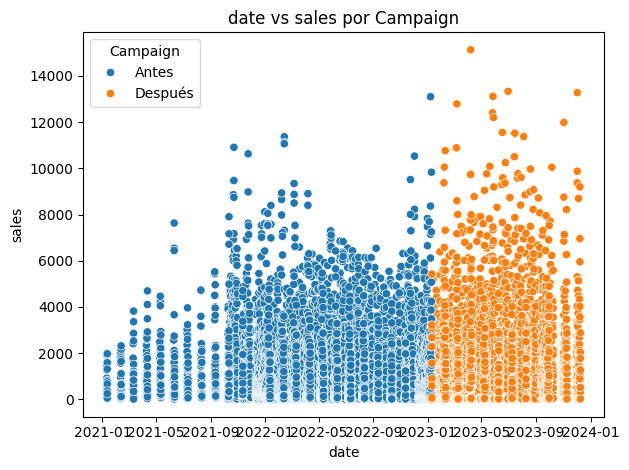

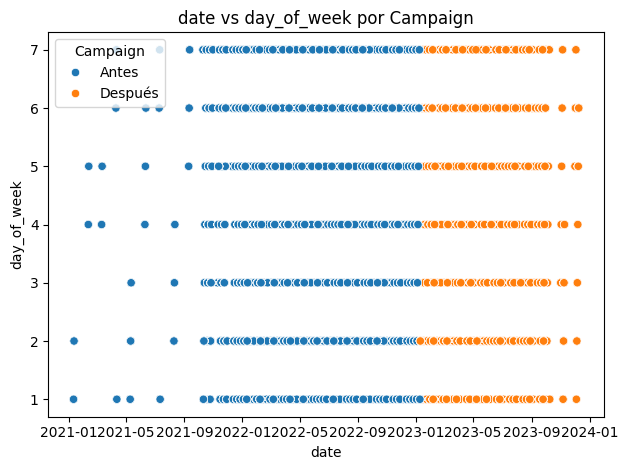

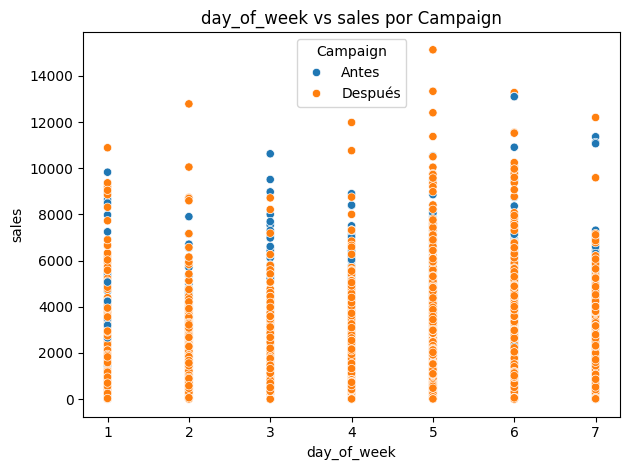

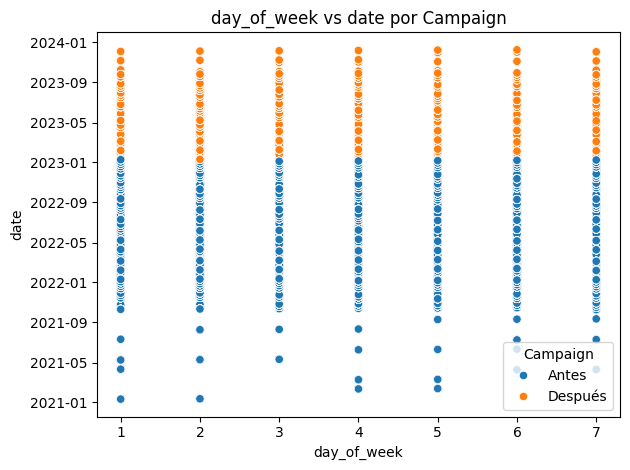

In [84]:
for rows in Num_cols:
    for col in Num_cols:
        if rows == col:
            continue
        sns.scatterplot(
            data=df,
            x=rows,
            y=col,
            hue=chosen_cat  
            )
        plt.title(f'{rows} vs {col} por {chosen_cat}')
        plt.tight_layout()
        plt.show()

# EDA

In [85]:
from scipy import stats
import warnings
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')

## Univariante

In [86]:
print("=== INFORMACIÓN DEL CONJUNTO DE DATOS ===")
print(f"Forma: {df.shape}")
print(f"Registros totales: {len(df)}")
print(f"Rango de fechas: {df['date'].min()} a {df['date'].max()}")
print(f"Marcas únicas: {df['brand'].nunique()}")

print("\n=== ESTADÍSTICAS DE VENTAS ===")
print(df['sales'].describe())

print("\n=== MÉTRICAS DE DISTRIBUCIÓN ===")
print(f"Asimetría: {skew(df['sales'].dropna()):.4f}")
print(f"Curtosis: {kurtosis(df['sales'].dropna()):.4f}")

# Calcular cuartiles
Q1 = df['sales'].quantile(0.25)
Q3 = df['sales'].quantile(0.75)
IQR = Q3 - Q1
print(f"Rango intercuartílico (IQR): ${IQR:.2f}")

# Umbrales para valores atípicos
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
valores_atipicos = df[(df['sales'] < limite_inferior) | (df['sales'] > limite_superior)]
print(f"Valores atípicos potenciales (método IQR): {len(valores_atipicos)} registros")

print("\n=== ESTADÍSTICAS DE FECHAS ===")
print(f"Rango de fechas: {df['date'].min()} a {df['date'].max()}")
print(f"Días totales: {(df['date'].max() - df['date'].min()).days}")
print(f"Fechas únicas: {df['date'].nunique()}")
print(f"Fecha más frecuente: {df['date'].mode().iloc[0].strftime('%Y-%m-%d')}")

# Métricas basadas en fechas
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()

print("\n=== ESTADÍSTICAS ANUALES ===")
estadisticas_anuales = df.groupby('year')['sales'].agg(['count', 'sum', 'mean', 'median'])
print(estadisticas_anuales)

print("\n=== PATRONES MENSUALES ===")
promedio_mensual = df.groupby('month')['sales'].mean().sort_values(ascending=False)
print(promedio_mensual)

print("\n=== PATRONES POR DÍA DE LA SEMANA ===")
promedio_dia_semana = df.groupby('day_of_week')['sales'].mean()
print(promedio_dia_semana)

=== INFORMACIÓN DEL CONJUNTO DE DATOS ===
Forma: (10944, 7)
Registros totales: 10944
Rango de fechas: 2021-01-11 00:00:00 a 2023-12-09 00:00:00
Marcas únicas: 25

=== ESTADÍSTICAS DE VENTAS ===
count    10944.000000
mean      1310.038316
std       1646.480628
min          0.000000
25%        143.920000
50%        673.740000
75%       1897.832500
max      15134.250000
Name: sales, dtype: float64

=== MÉTRICAS DE DISTRIBUCIÓN ===
Asimetría: 2.1931
Curtosis: 6.6773
Rango intercuartílico (IQR): $1753.91
Valores atípicos potenciales (método IQR): 589 registros

=== ESTADÍSTICAS DE FECHAS ===
Rango de fechas: 2021-01-11 00:00:00 a 2023-12-09 00:00:00
Días totales: 1062
Fechas únicas: 728
Fecha más frecuente: 2021-11-19

=== ESTADÍSTICAS ANUALES ===
      count         sum         mean    median
year                                          
2021   1591  1940721.98  1219.812684   569.420
2022   5805  6602159.30  1137.322877   502.670
2023   3548  5794178.05  1633.082878  1061.335

=== PATRONE

## Bi variante

ANÁLISIS DE IMPACTO DE CAMPAÑA: ANTES vs DESPUÉS

COMPARACIÓN DE VENTAS POR PERIODO DE CAMPAÑA:
          count         sum     mean   median      std  min       max
Campaign                                                             
Antes      7514  8742294.30  1163.47   528.43  1490.86  0.0  13103.81
Después    3430  5594765.03  1631.13  1061.34  1905.57  0.0  15134.25

Valores únicos en 'Campaign': ['Antes' 'Después']

CAMBIO PROMEDIO EN VENTAS: 40.2%
   Antes: $1163.47
   Después:  $1631.13


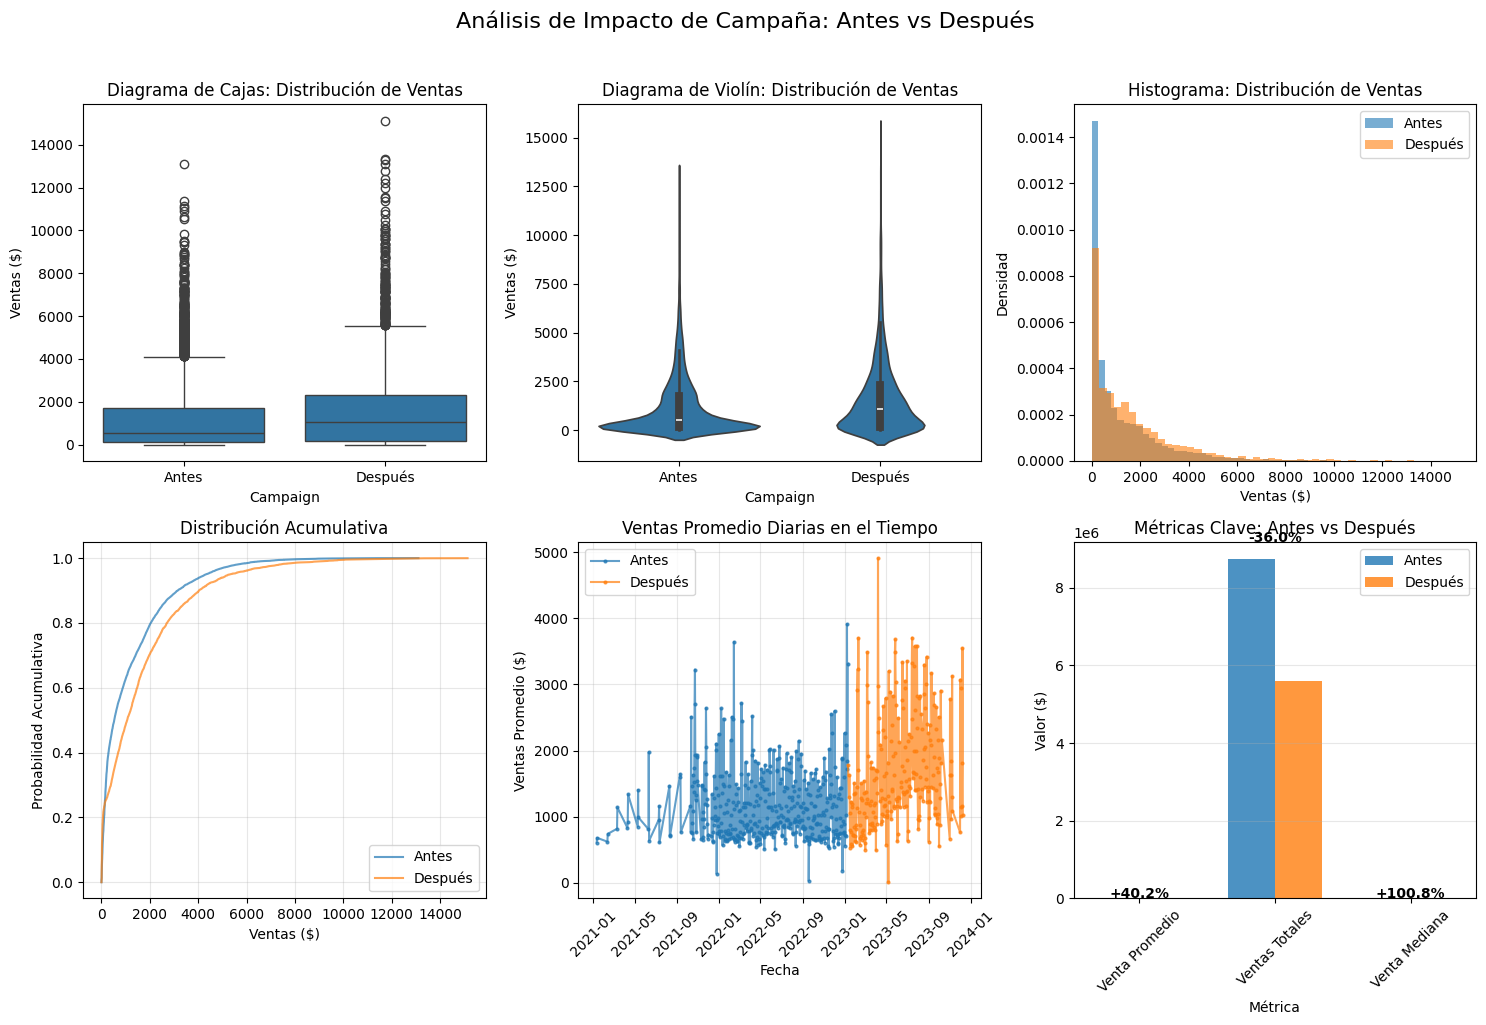


 PRUEBAS DE SIGNIFICANCIA ESTADÍSTICA:
Prueba t (Welch): t = 12.707, p = 0.000000
  SIGNIFICATIVO (p < 0.05)
Prueba U de Mann-Whitney: U = 14544299, p = 0.000000
  SIGNIFICATIVO (p < 0.05)
Tamaño del efecto (d de Cohen): 0.287
  Interpretación: Pequeño

 INTERVALOS DE CONFIANZA AL 95%:
Antes: $1163.47 ($1129.75 - $1197.18)
Después:  $1631.13 ($1567.33 - $1694.92)

 DESEMPEÑO DE LAS 5 MEJORES MARCAS POR CAMPAÑA:
Producto 9:
  Antes: $3396.29
  Después:  $5284.71
  Cambio: +55.6%
------------------------------
Producto 6:
  Antes: $3587.77
  Después:  $3346.40
  Cambio: -6.7%
------------------------------
Producto 5:
  Antes: $3262.19
  Después:  $2618.36
  Cambio: -19.7%
------------------------------
Producto 14:
  Antes: $2465.39
  Después:  $2022.59
  Cambio: -18.0%
------------------------------
Producto 7:
  Antes: $1273.41
  Después:  $3042.67
  Cambio: +138.9%
------------------------------

RESUMEN DEL IMPACTO DE LA CAMPAÑA
✅ RESULTADO: La campaña parece EXITOSA
   Las ventas 

In [87]:
from scipy.stats import ttest_ind, mannwhitneyu


print("ANÁLISIS DE IMPACTO DE CAMPAÑA: ANTES vs DESPUÉS")
print("=" * 60)

# ESTADÍSTICAS BÁSICAS DE COMPARACIÓN
print("\nCOMPARACIÓN DE VENTAS POR PERIODO DE CAMPAÑA:")
campaign_stats = df.groupby('Campaign')['sales'].agg([
    'count', 'sum', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print(campaign_stats)

print(f"\nValores únicos en 'Campaign': {df['Campaign'].unique()}")

before_mean = campaign_stats.loc['Antes', 'mean']  
after_mean = campaign_stats.loc['Después', 'mean']
pct_change = ((after_mean - before_mean) / before_mean) * 100

print(f"\nCAMBIO PROMEDIO EN VENTAS: {pct_change:.1f}%")
print(f"   Antes: ${before_mean:.2f}")
print(f"   Después:  ${after_mean:.2f}")

# VISUALIZACIÓN: DISTRIBUCIÓN ANTES VS DESPUÉS
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Análisis de Impacto de Campaña: Antes vs Después', fontsize=16, y=1.02)

# Boxplot
sns.boxplot(data=df, x='Campaign', y='sales', ax=axes[0, 0])
axes[0, 0].set_title('Diagrama de Cajas: Distribución de Ventas')
axes[0, 0].set_ylabel('Ventas ($)')

# Violin plot
sns.violinplot(data=df, x='Campaign', y='sales', ax=axes[0, 1])
axes[0, 1].set_title('Diagrama de Violín: Distribución de Ventas')
axes[0, 1].set_ylabel('Ventas ($)')

# Histograma superpuesto
campaign_values = df['Campaign'].unique()
for campaign in campaign_values:
    campaign_data = df[df['Campaign'] == campaign]['sales']
    axes[0, 2].hist(campaign_data, bins=50, alpha=0.6, label=campaign, density=True)
axes[0, 2].set_title('Histograma: Distribución de Ventas')
axes[0, 2].set_xlabel('Ventas ($)')
axes[0, 2].set_ylabel('Densidad')
axes[0, 2].legend()

# Distribución acumulativa
for campaign in campaign_values:
    campaign_data = df[df['Campaign'] == campaign]['sales'].sort_values()
    y = np.arange(len(campaign_data)) / len(campaign_data)
    axes[1, 0].plot(campaign_data, y, label=campaign, alpha=0.7)
axes[1, 0].set_title('Distribución Acumulativa')
axes[1, 0].set_xlabel('Ventas ($)')
axes[1, 0].set_ylabel('Probabilidad Acumulativa')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Serie de tiempo
if 'date' in df.columns:
    # Agregar por fecha y campaña
    daily_sales = df.groupby(['date', 'Campaign'])['sales'].mean().reset_index()
    
    # Ordenar por fecha
    daily_sales = daily_sales.sort_values('date')
    
    # Graficar
    for campaign in campaign_values:
        campaign_data = daily_sales[daily_sales['Campaign'] == campaign]
        axes[1, 1].plot(campaign_data['date'], campaign_data['sales'], 
                       marker='o', markersize=2, label=campaign, alpha=0.7)
    axes[1, 1].set_title('Ventas Promedio Diarias en el Tiempo')
    axes[1, 1].set_xlabel('Fecha')
    axes[1, 1].set_ylabel('Ventas Promedio ($)')
    axes[1, 1].legend()
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)

# Gráfico de barras de cambio porcentual 
categories = ['Venta Promedio', 'Ventas Totales', 'Venta Mediana']
before_values = [
    campaign_stats.loc['Antes', 'mean'],  
    campaign_stats.loc['Antes', 'sum'],   
    campaign_stats.loc['Antes', 'median'] 
]
after_values = [
    campaign_stats.loc['Después', 'mean'],  
    campaign_stats.loc['Después', 'sum'],   
    campaign_stats.loc['Después', 'median'] 
]
pct_changes = [((a-b)/b)*100 for a, b in zip(after_values, before_values)]

x = np.arange(len(categories))
width = 0.35
axes[1, 2].bar(x - width/2, before_values, width, label='Antes', alpha=0.8)
axes[1, 2].bar(x + width/2, after_values, width, label='Después', alpha=0.8)

# Añadir etiquetas de cambio porcentual
for i, pct in enumerate(pct_changes):
    axes[1, 2].text(i, max(before_values[i], after_values[i]) * 1.05, 
                   f'{pct:+.1f}%', ha='center', fontweight='bold')

axes[1, 2].set_title('Métricas Clave: Antes vs Después')
axes[1, 2].set_xlabel('Métrica')
axes[1, 2].set_ylabel('Valor ($)')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(categories, rotation=45)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 3. PRUEBAS ESTADÍSTICAS
print("\n PRUEBAS DE SIGNIFICANCIA ESTADÍSTICA:")

# Separar datos
before_sales = df[df['Campaign'] == 'Antes']['sales']  
after_sales = df[df['Campaign'] == 'Después']['sales'] 

# Prueba t (paramétrica)
t_stat, p_value_t = ttest_ind(after_sales, before_sales, equal_var=False)
print(f"Prueba t (Welch): t = {t_stat:.3f}, p = {p_value_t:.6f}")
print(f"  {'SIGNIFICATIVO' if p_value_t < 0.05 else 'NO SIGNIFICATIVO'} (p < 0.05)")

# Prueba U de Mann-Whitney (no paramétrica)
u_stat, p_value_u = mannwhitneyu(after_sales, before_sales, alternative='two-sided')
print(f"Prueba U de Mann-Whitney: U = {u_stat:.0f}, p = {p_value_u:.6f}")
print(f"  {'SIGNIFICATIVO' if p_value_u < 0.05 else 'NO SIGNIFICATIVO'} (p < 0.05)")

# Tamaño del efecto (d de Cohen)
from scipy.stats import norm
n1, n2 = len(before_sales), len(after_sales)
sd_pooled = np.sqrt(((n1-1)*before_sales.std()**2 + (n2-1)*after_sales.std()**2) / (n1+n2-2))
cohens_d = (after_mean - before_mean) / sd_pooled
print(f"Tamaño del efecto (d de Cohen): {cohens_d:.3f}")
print(f"  Interpretación: {'Grande' if abs(cohens_d) > 0.8 else 'Mediano' if abs(cohens_d) > 0.5 else 'Pequeño'}")

# INTERVALOS DE CONFIANZA
from scipy.stats import sem, t

def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return mean, mean - h, mean + h

before_mean, before_ci_low, before_ci_high = confidence_interval(before_sales)
after_mean, after_ci_low, after_ci_high = confidence_interval(after_sales)

print("\n INTERVALOS DE CONFIANZA AL 95%:")
print(f"Antes: ${before_mean:.2f} (${before_ci_low:.2f} - ${before_ci_high:.2f})")
print(f"Después:  ${after_mean:.2f} (${after_ci_low:.2f} - ${after_ci_high:.2f})")

# DESEMPEÑO DE LAS MARCAS TOP POR CAMPAÑA
print("\n DESEMPEÑO DE LAS 5 MEJORES MARCAS POR CAMPAÑA:")

# Top 5 marcas por ventas totales
top_5_brands = df.groupby('brand')['sales'].sum().nlargest(5).index

for brand in top_5_brands:
    brand_data = df[df['brand'] == brand]
    brand_before = brand_data[brand_data['Campaign'] == 'Antes']['sales'].mean() 
    brand_after = brand_data[brand_data['Campaign'] == 'Después']['sales'].mean()
    brand_change = ((brand_after - brand_before) / brand_before * 100) if brand_before > 0 else np.nan
    
    if not np.isnan(brand_change):
        print(f"{brand}:")
        print(f"  Antes: ${brand_before:.2f}")
        print(f"  Después:  ${brand_after:.2f}")
        print(f"  Cambio: {brand_change:+.1f}%")
        print("-" * 30)

# RESUMEN Y RECOMENDACIÓN
print("\n" + "=" * 60)
print("RESUMEN DEL IMPACTO DE LA CAMPAÑA")
print("=" * 60)

if p_value_t < 0.05:
    if after_mean > before_mean:
        print("✅ RESULTADO: La campaña parece EXITOSA")
        print(f"   Las ventas aumentaron un {pct_change:.1f}% en promedio")
        print(f"   Esta diferencia es estadísticamente significativa (p = {p_value_t:.4f})")
    else:
        print("❌ RESULTADO: La campaña parece NO EXITOSA")
        print(f"   Las ventas disminuyeron un {abs(pct_change):.1f}% en promedio")
        print(f"   Esta diferencia es estadísticamente significativa (p = {p_value_t:.4f})")
else:
    print("⚠️  RESULTADO: No se detectó impacto estadísticamente significativo")
    print(f"   Las ventas cambiaron un {pct_change:.1f}% en promedio")
    print(f"   Pero esta diferencia no es estadísticamente significativa (p = {p_value_t:.4f})")

print("\n RECOMENDACIONES:")
if pct_change > 10 and p_value_t < 0.05:
    print("   • La campaña fue muy exitosa - considere escalar iniciativas similares")
elif pct_change > 0 and p_value_t < 0.05:
    print("   • La campaña tuvo impacto positivo - refinar y repetir")
elif pct_change < 0 and p_value_t < 0.05:
    print("   • La campaña tuvo impacto negativo - analizar qué salió mal")
else:
    print("   • Impacto de la campaña no concluyente - recopile más datos o pruebe diferentes enfoques")


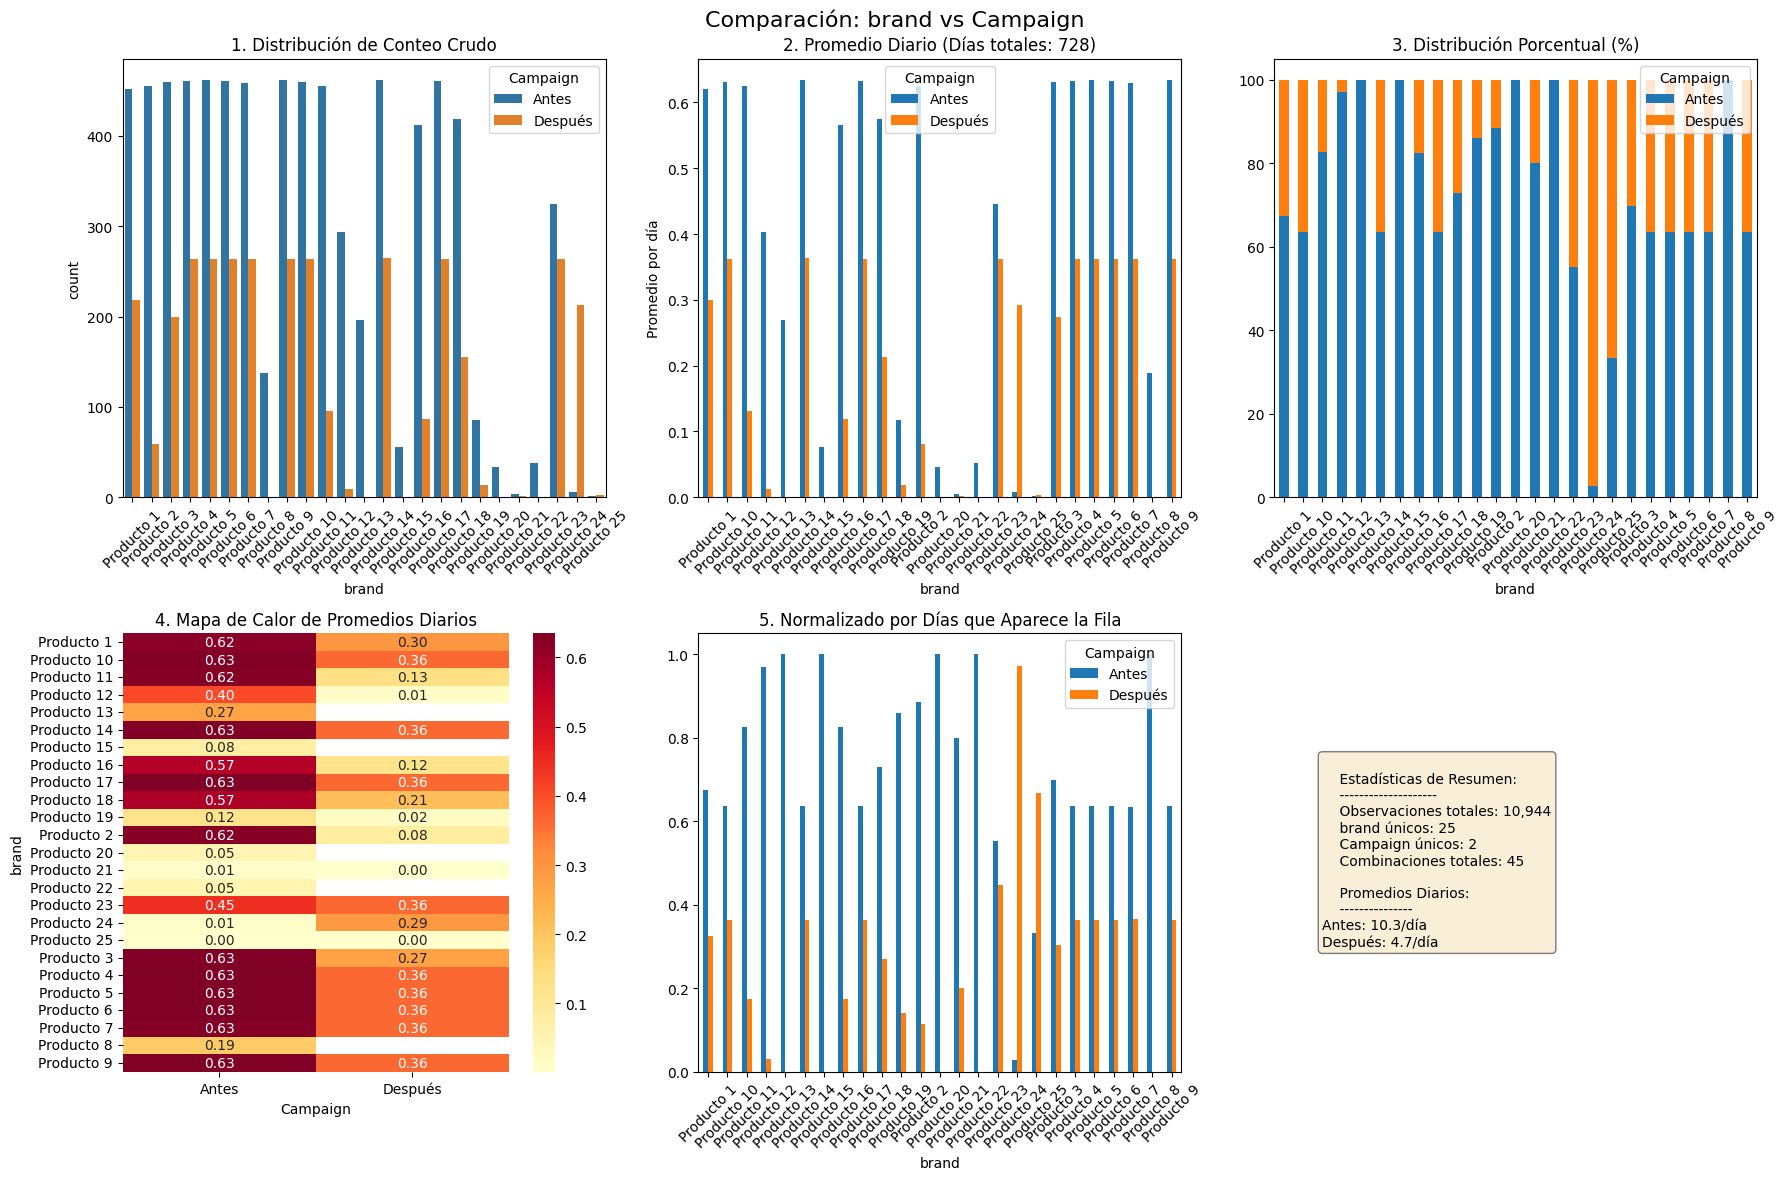

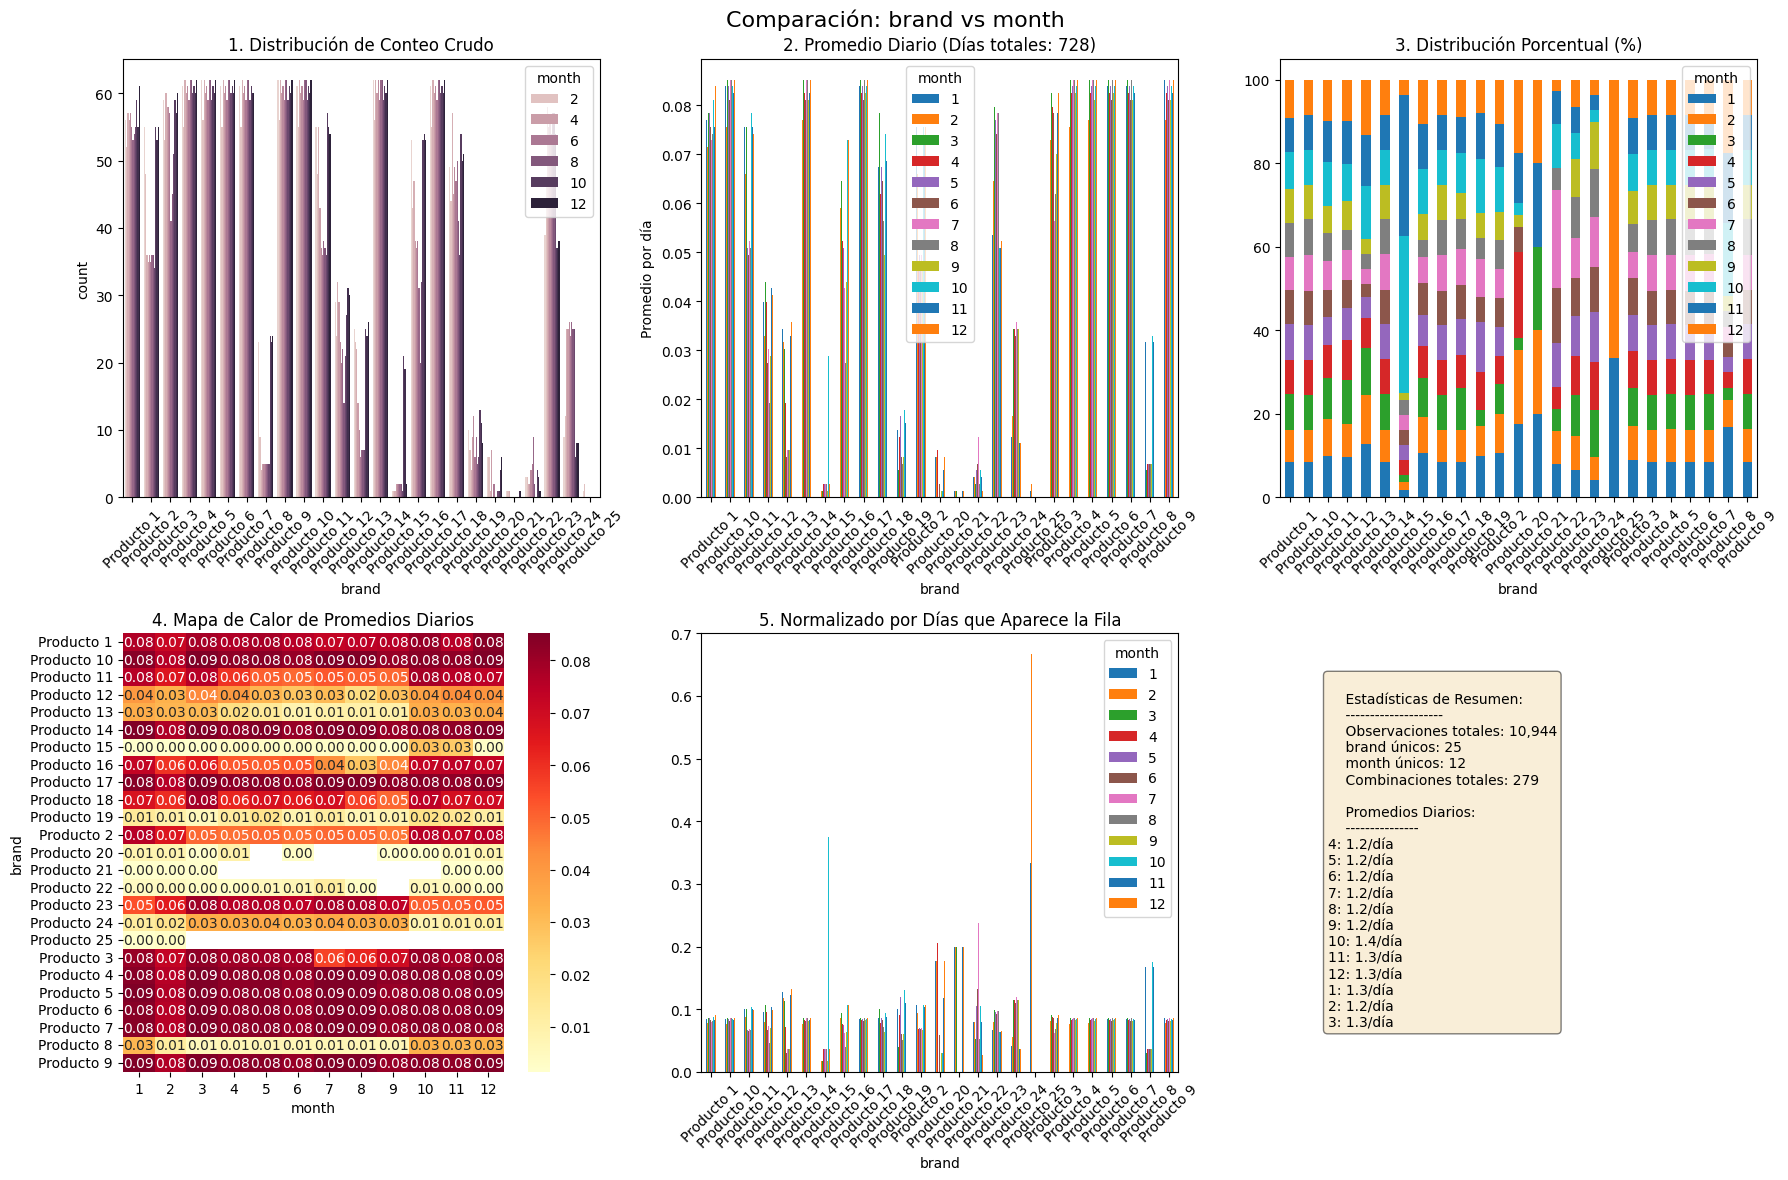

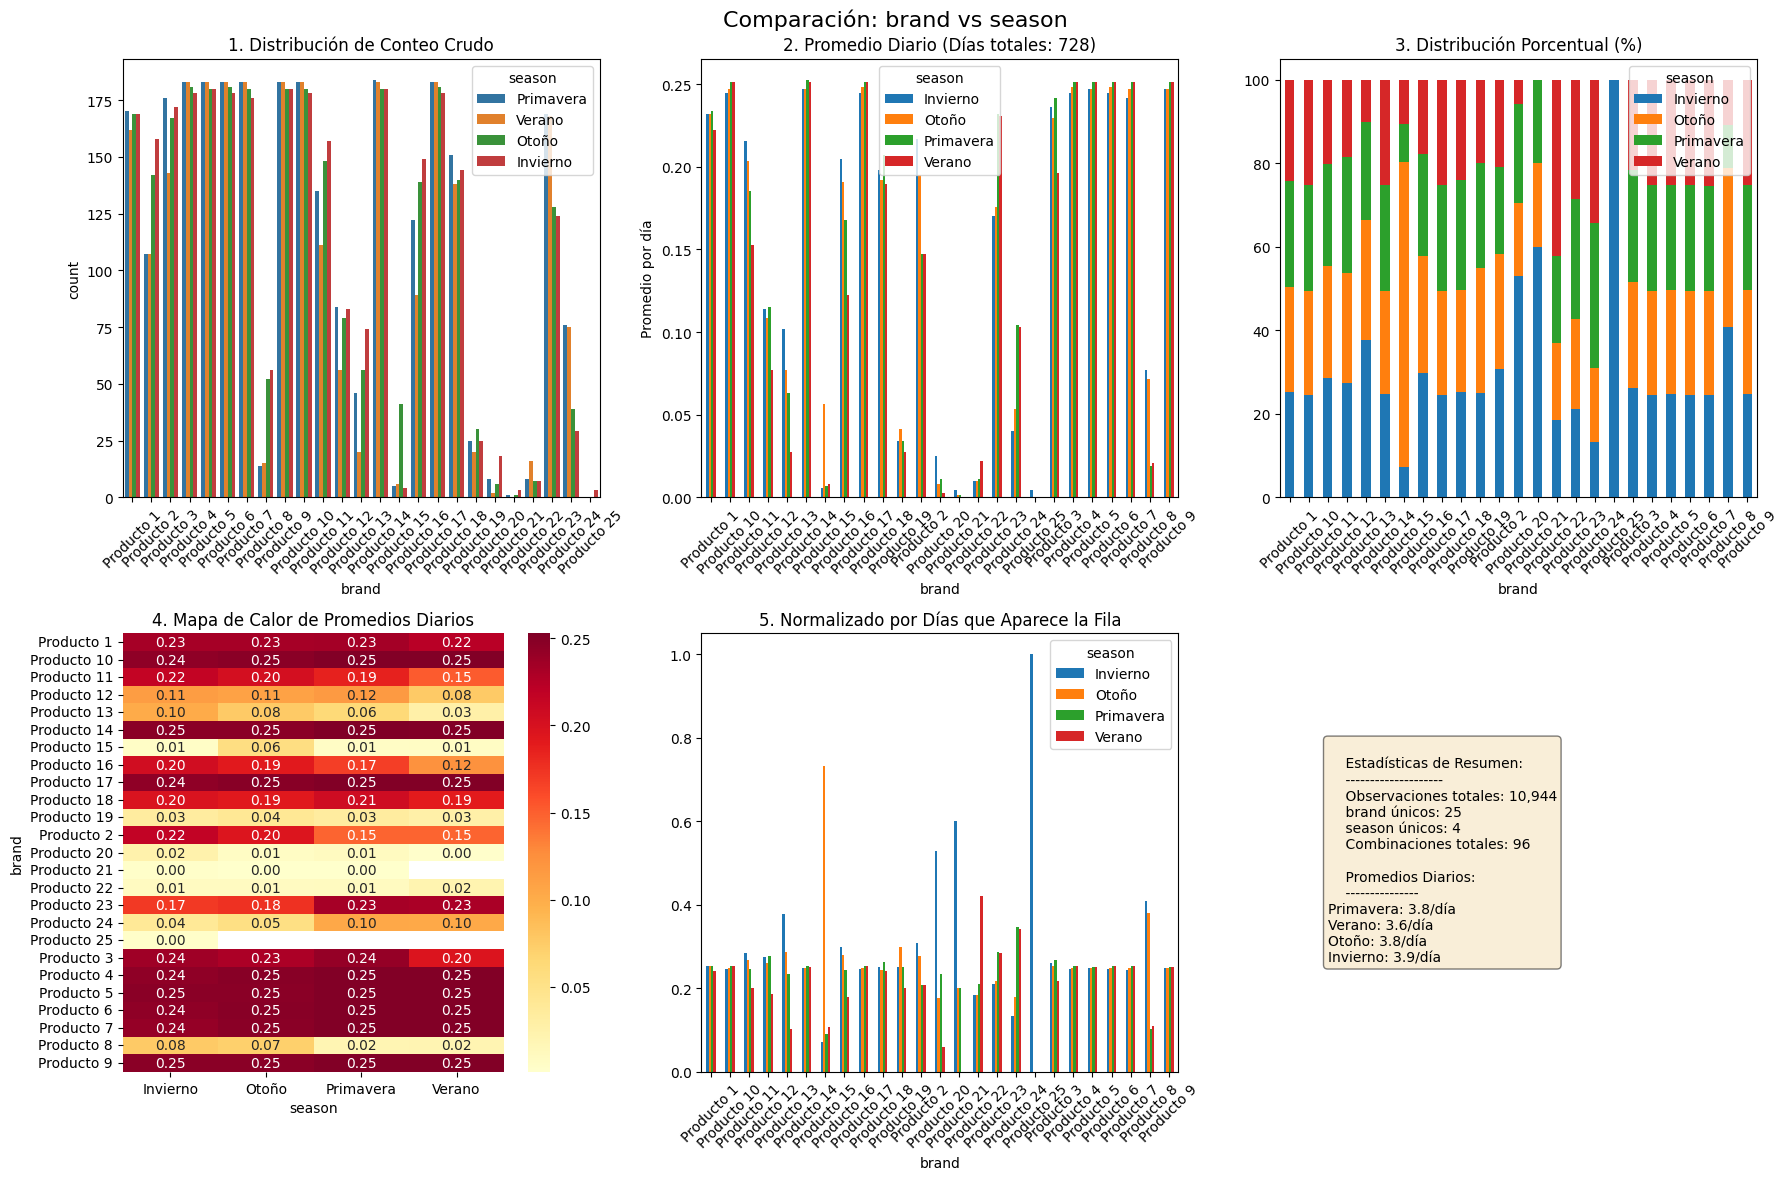

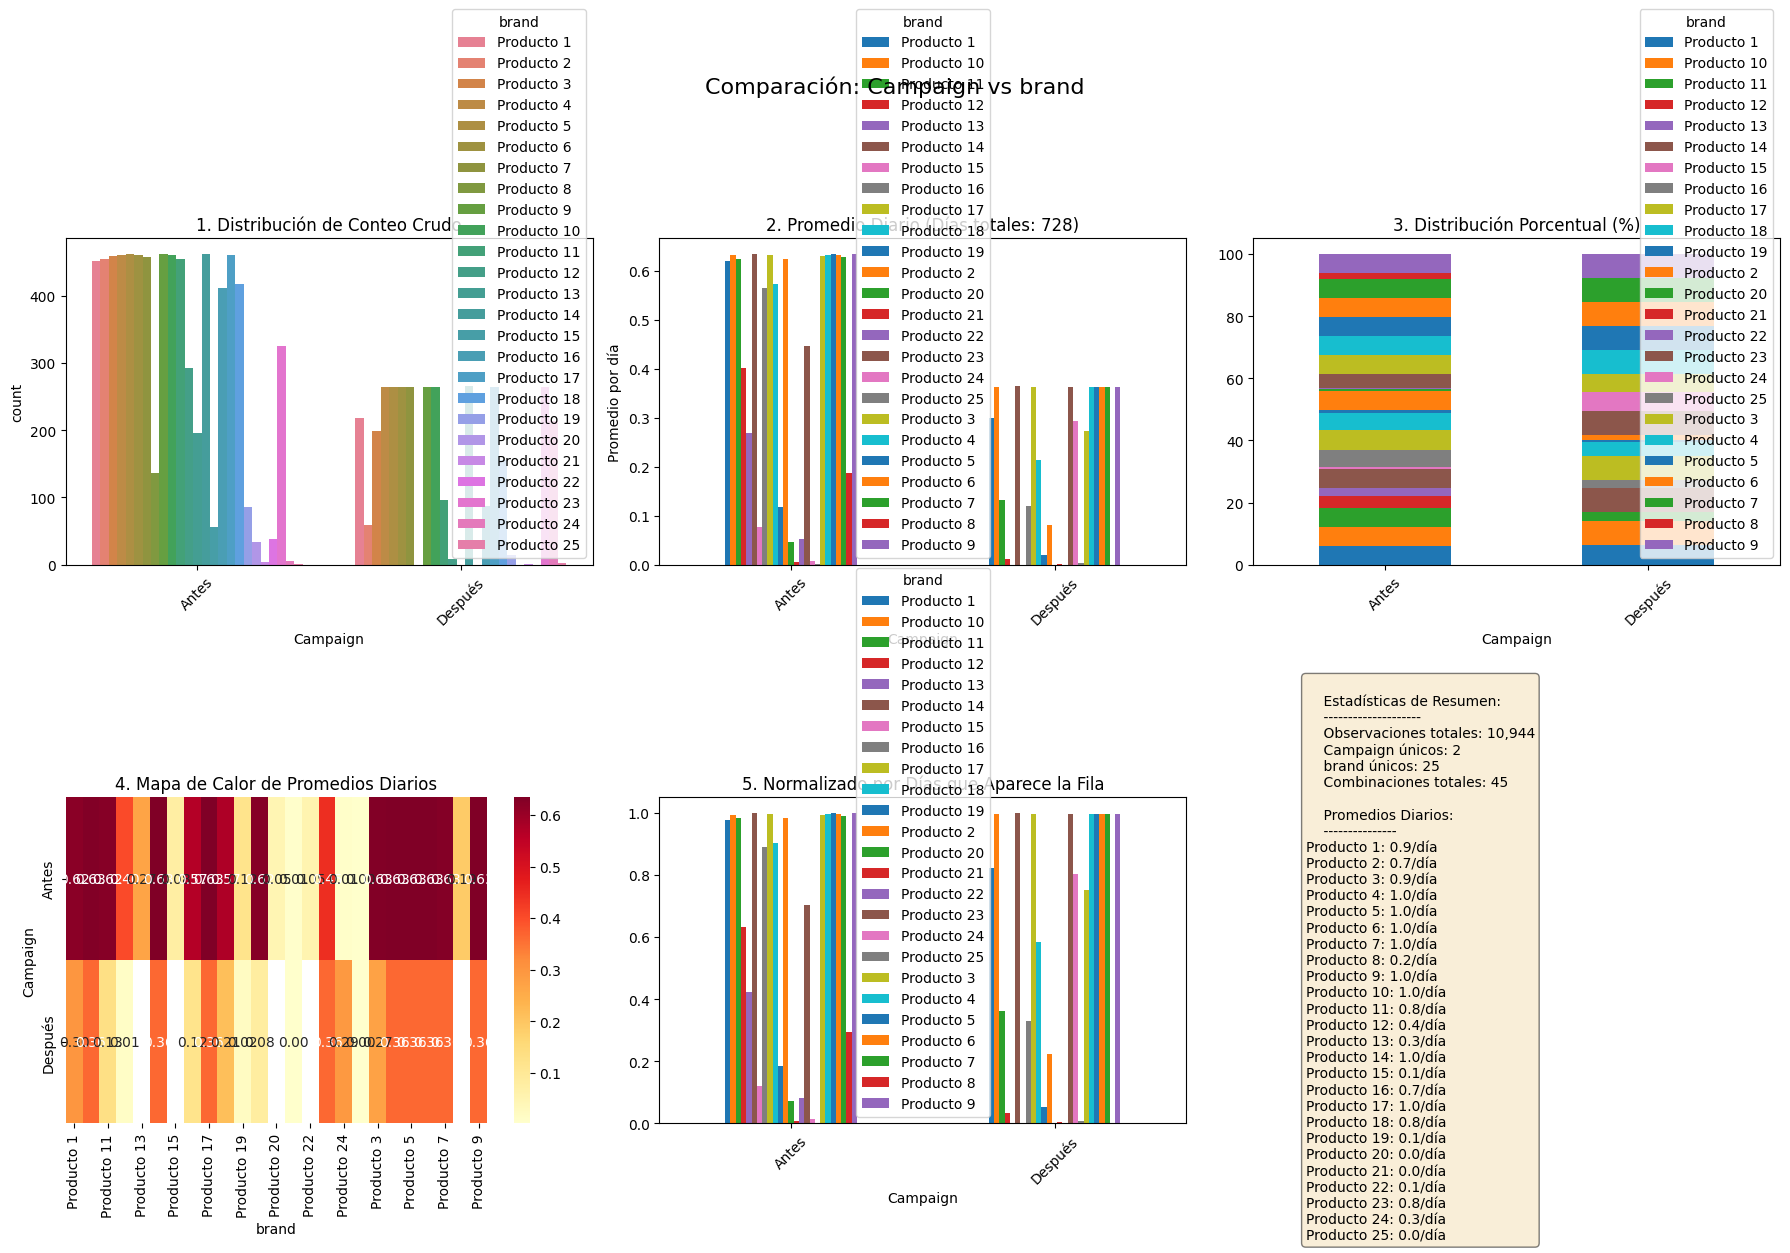

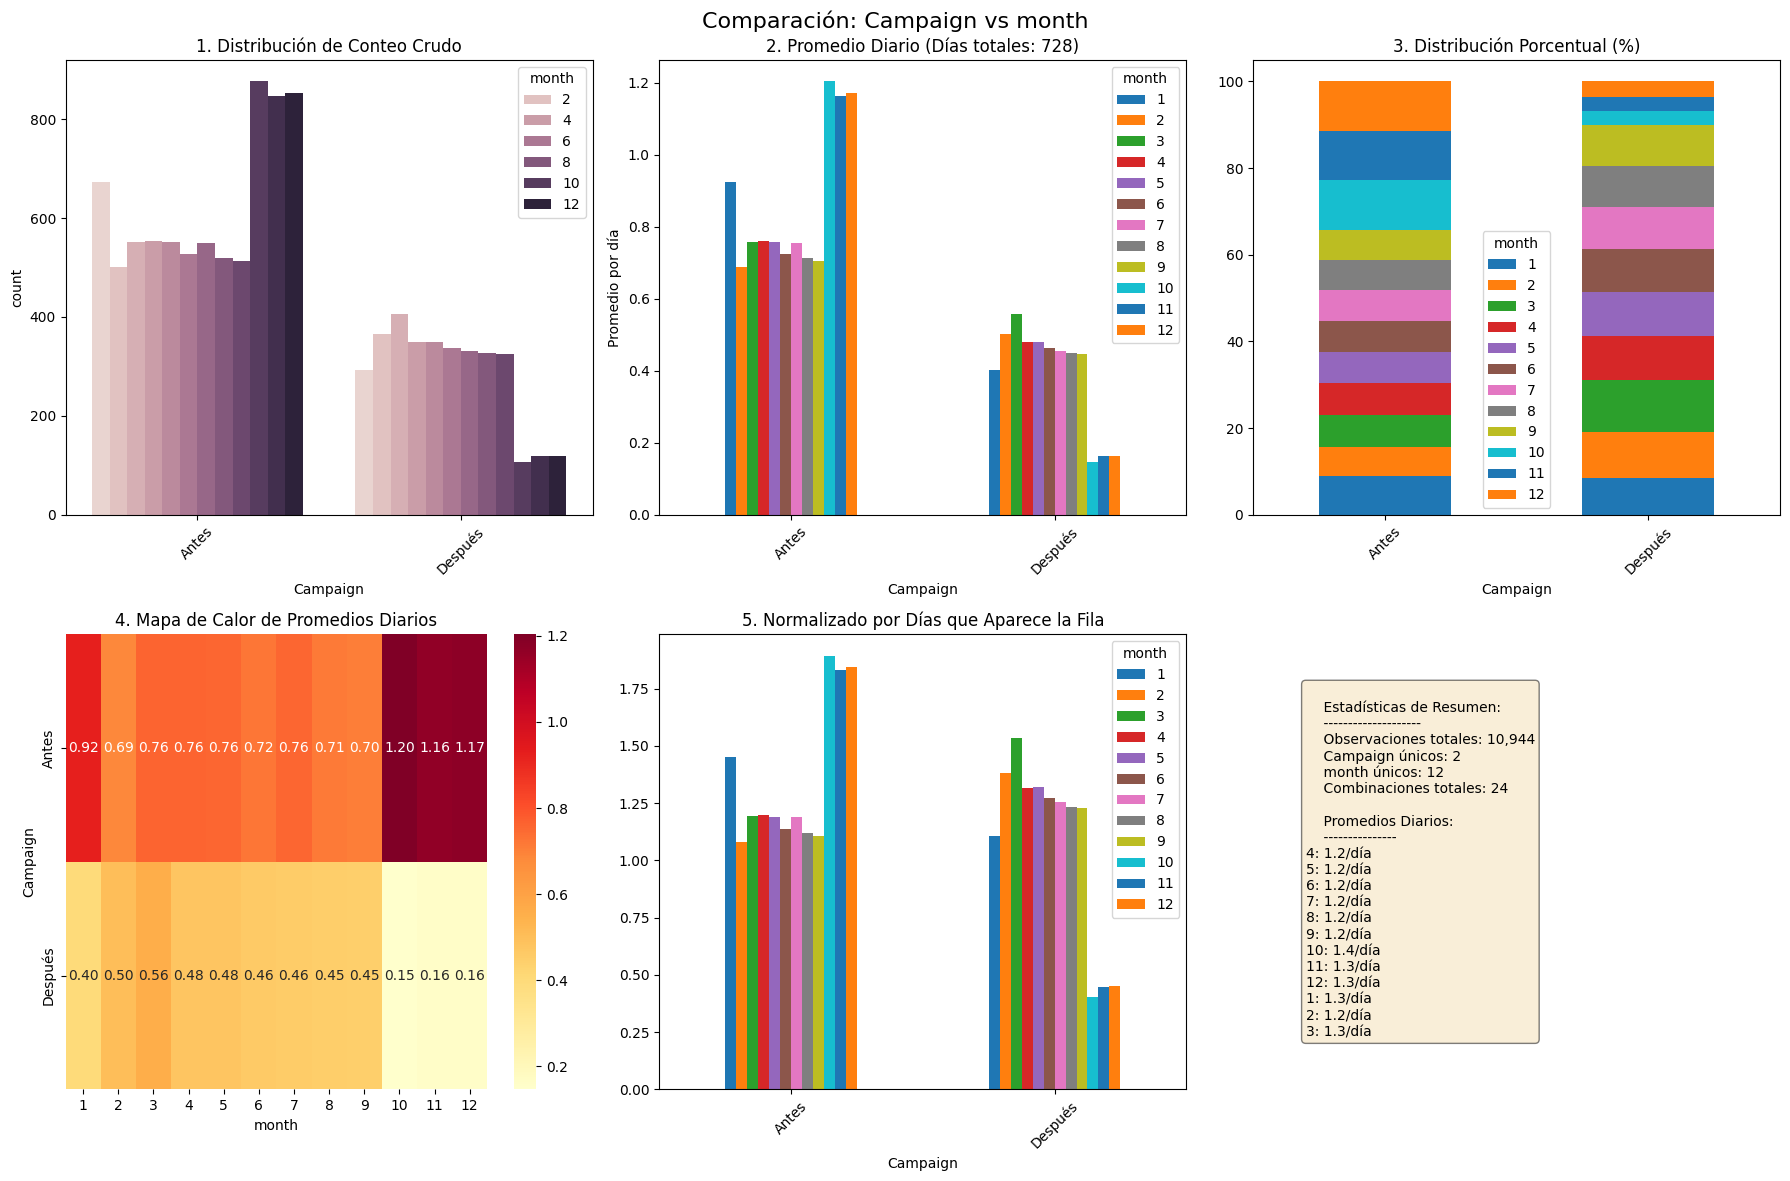

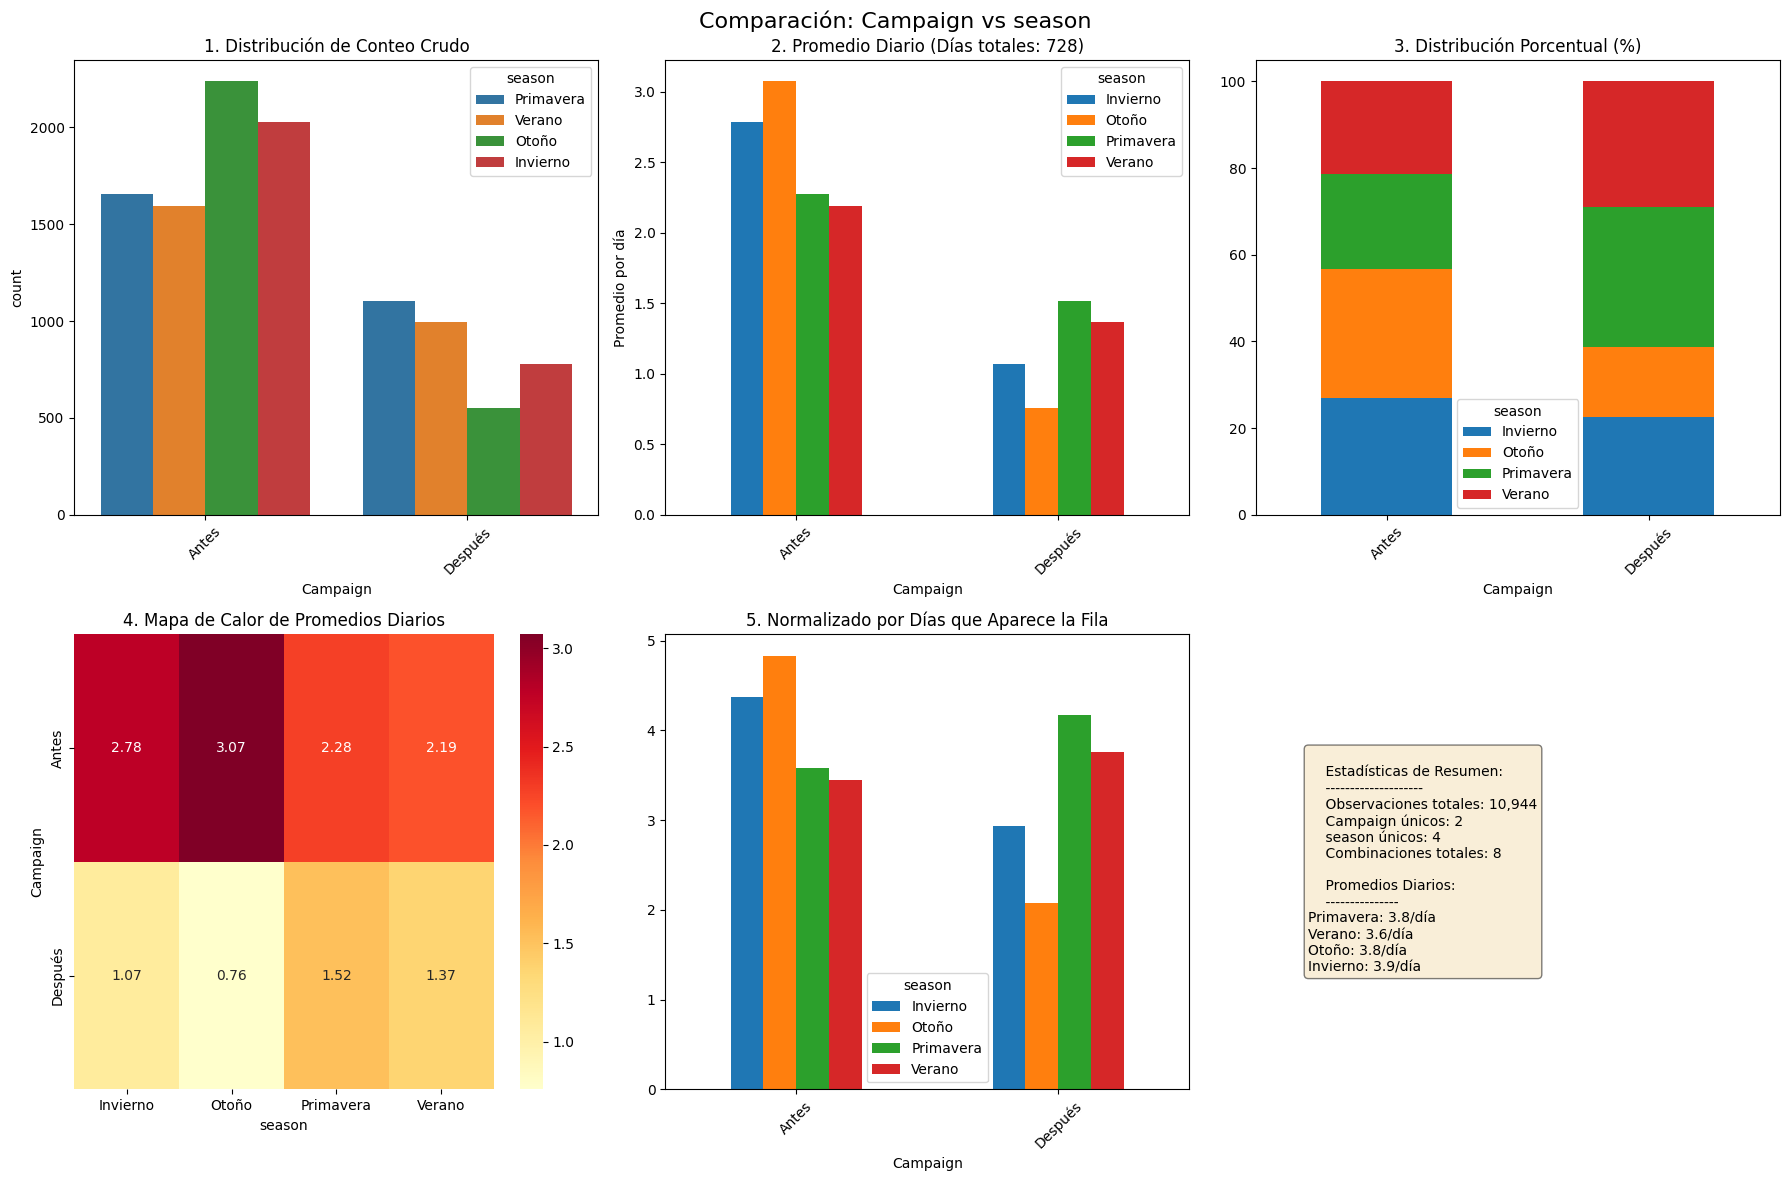

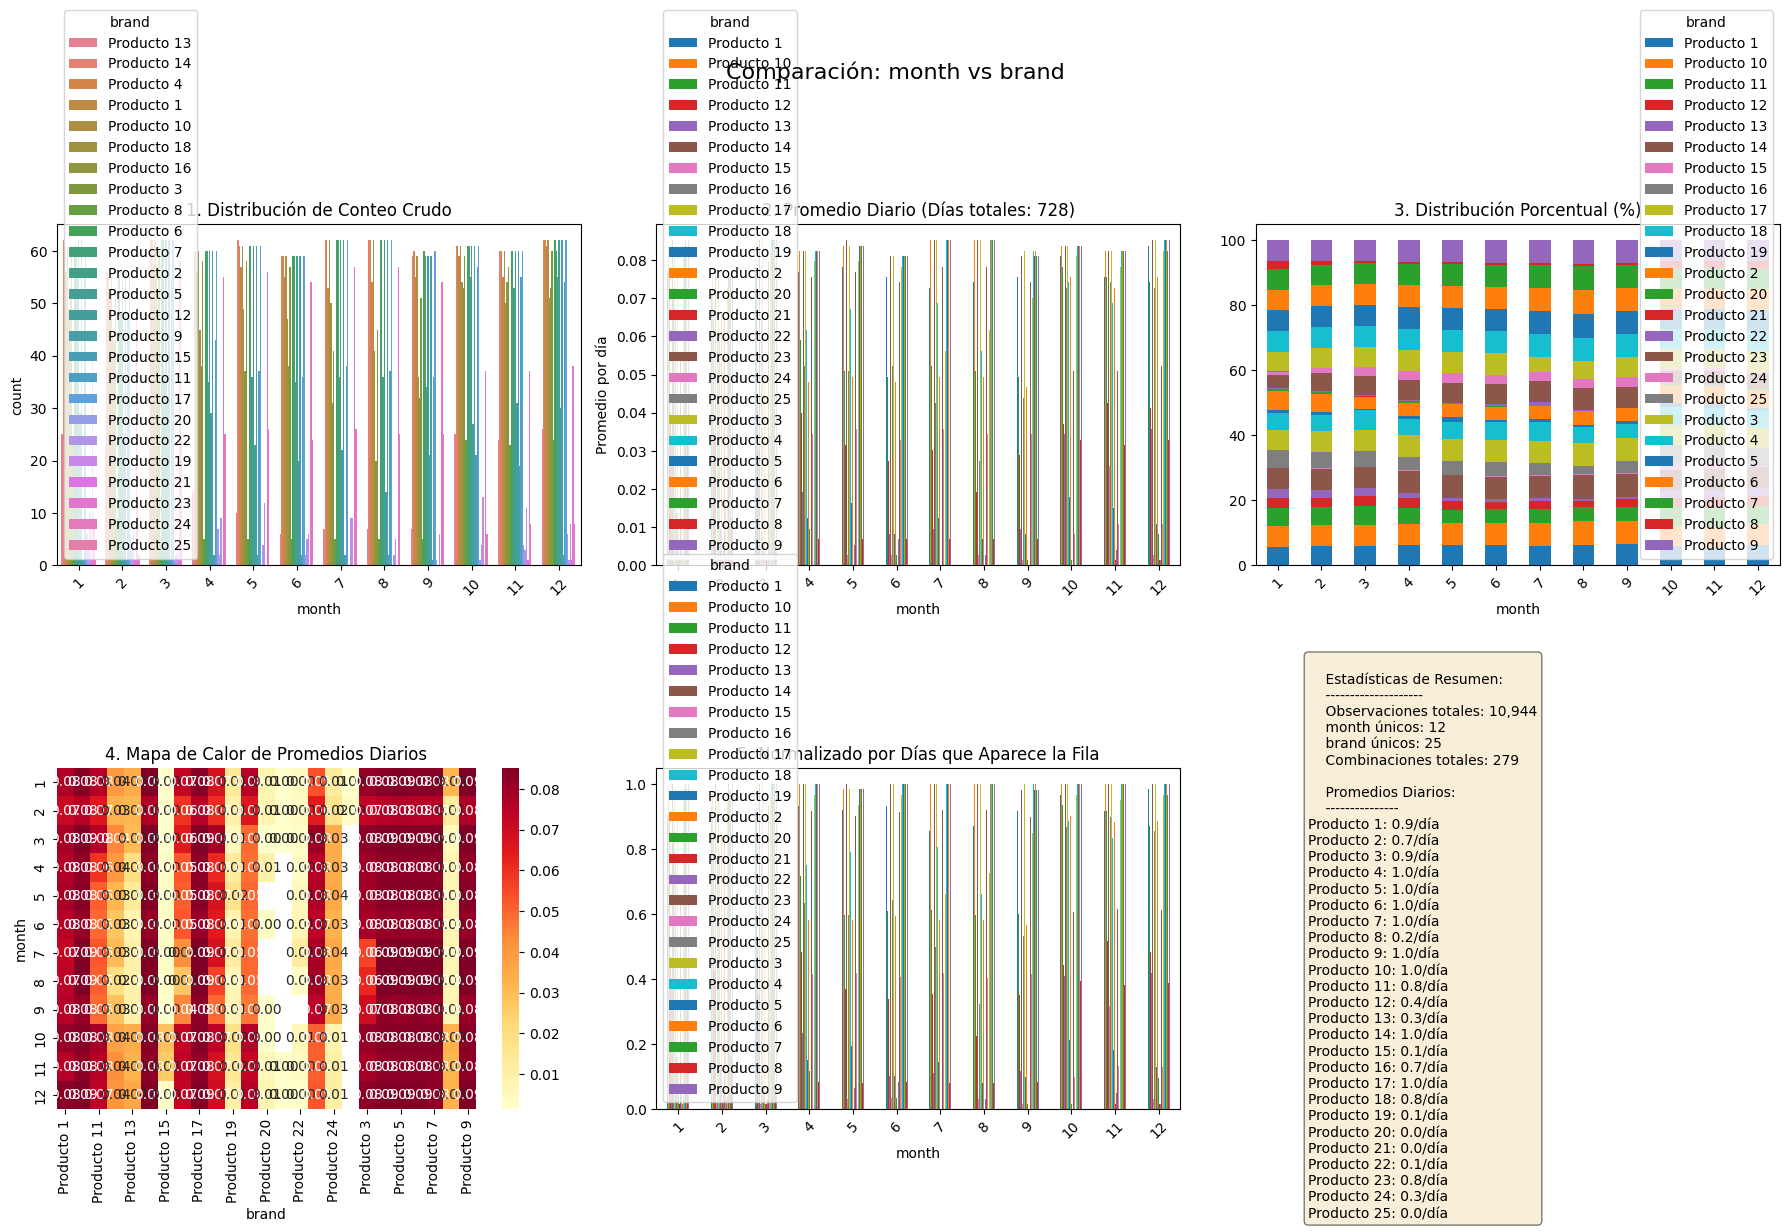

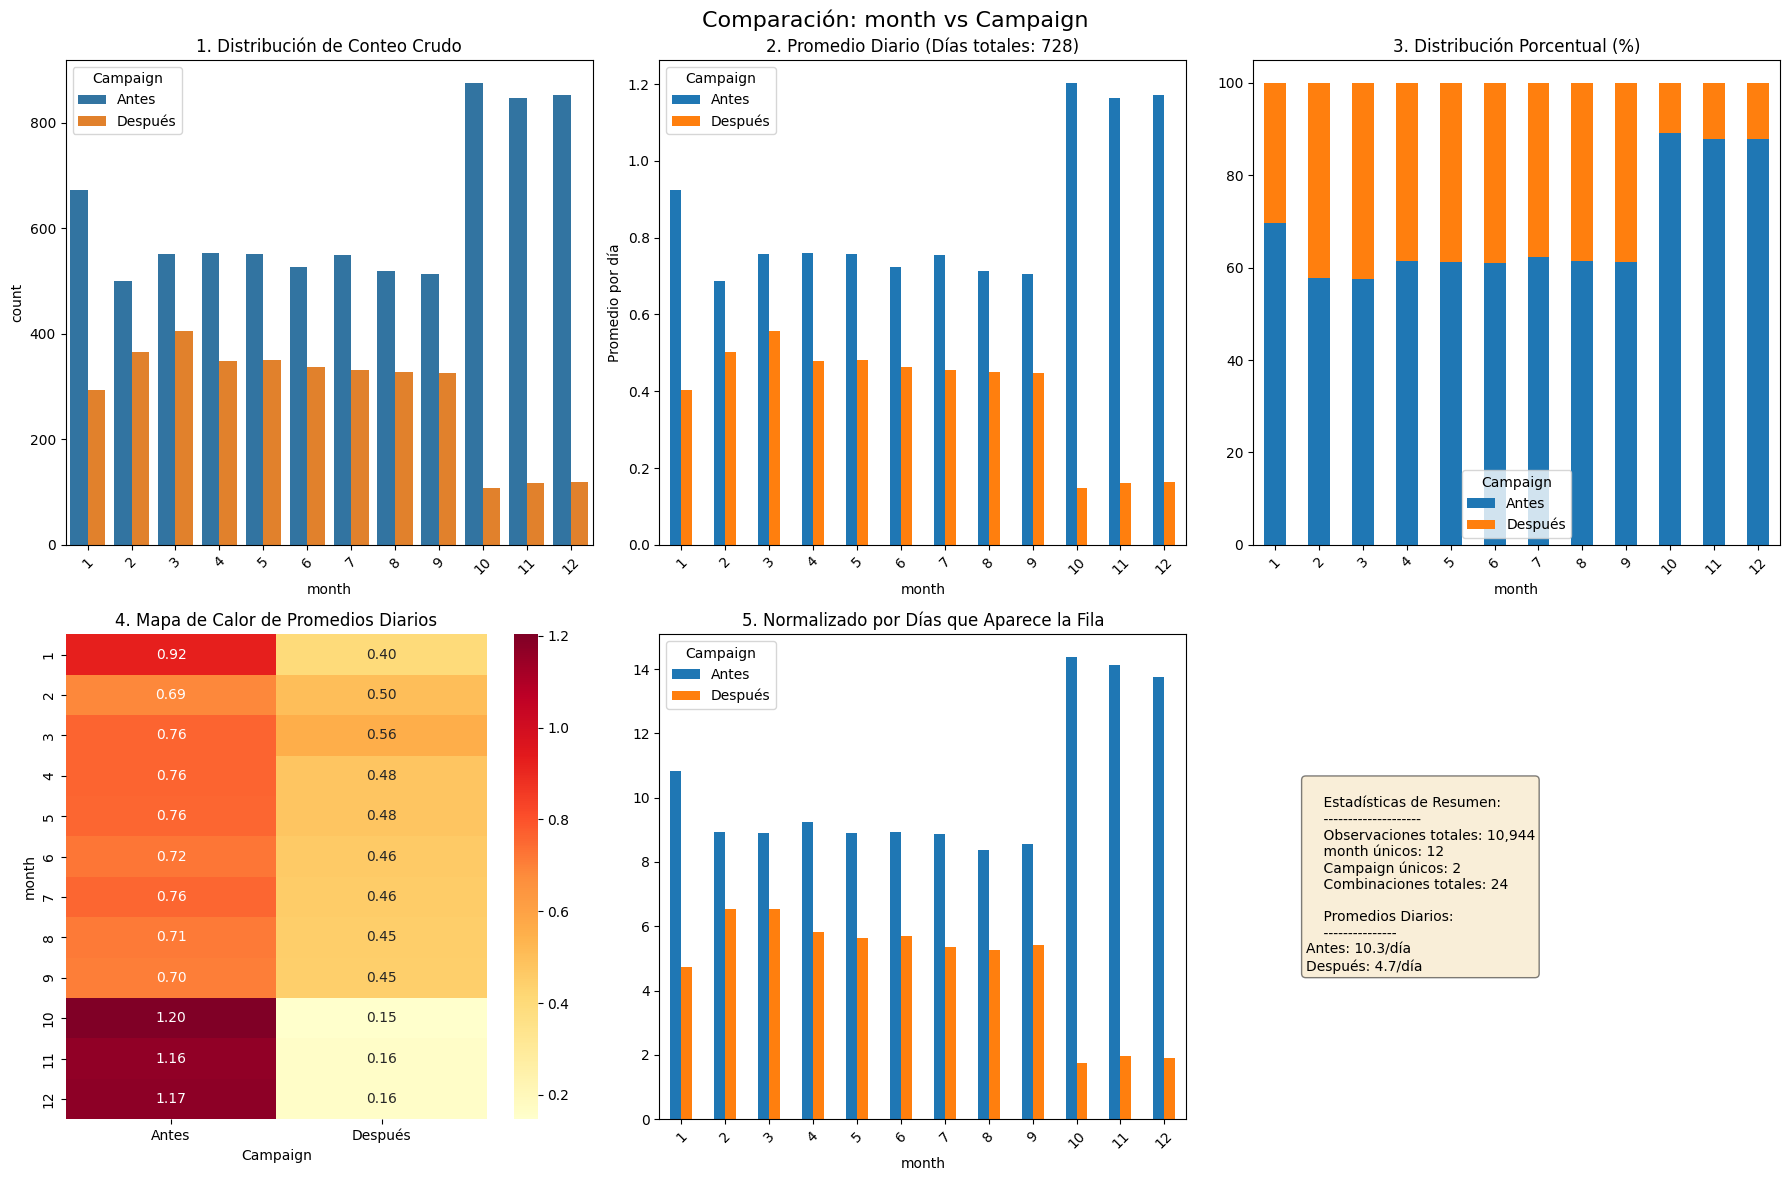

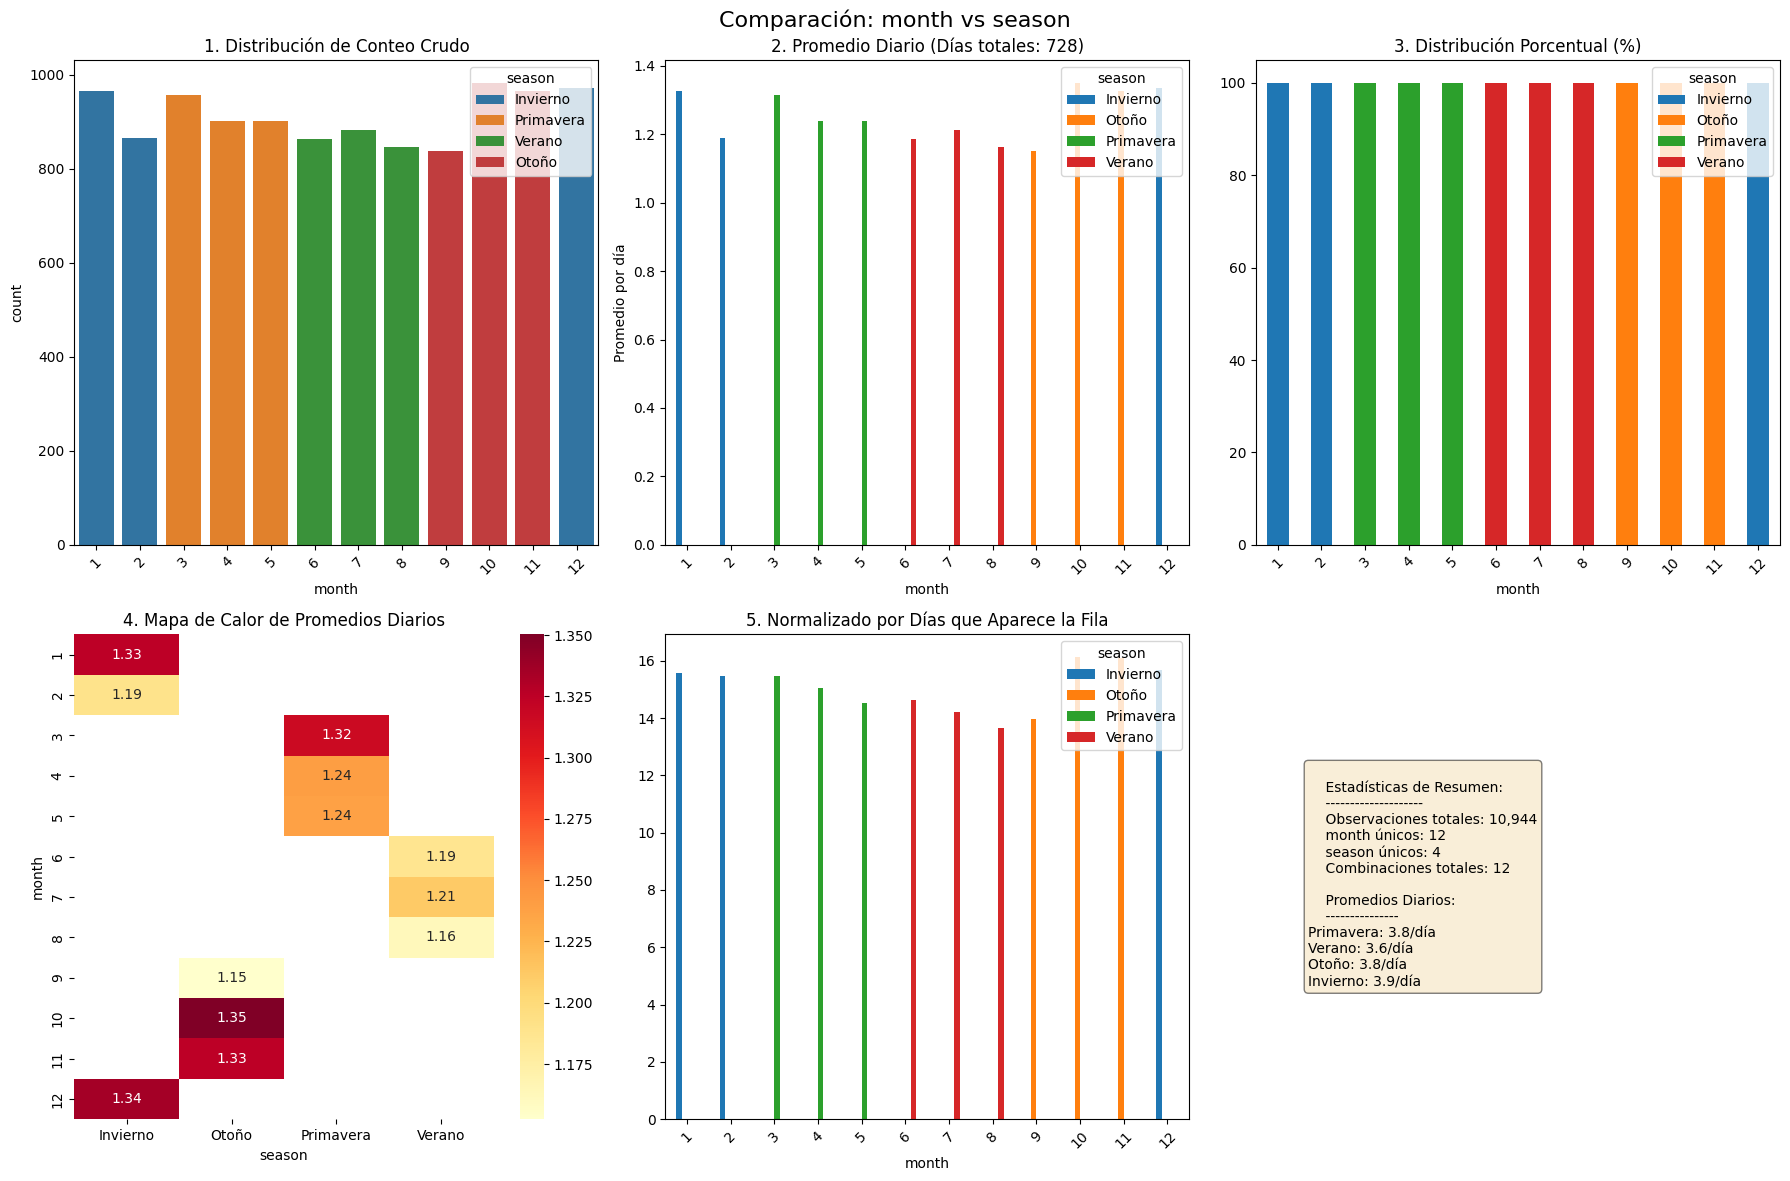

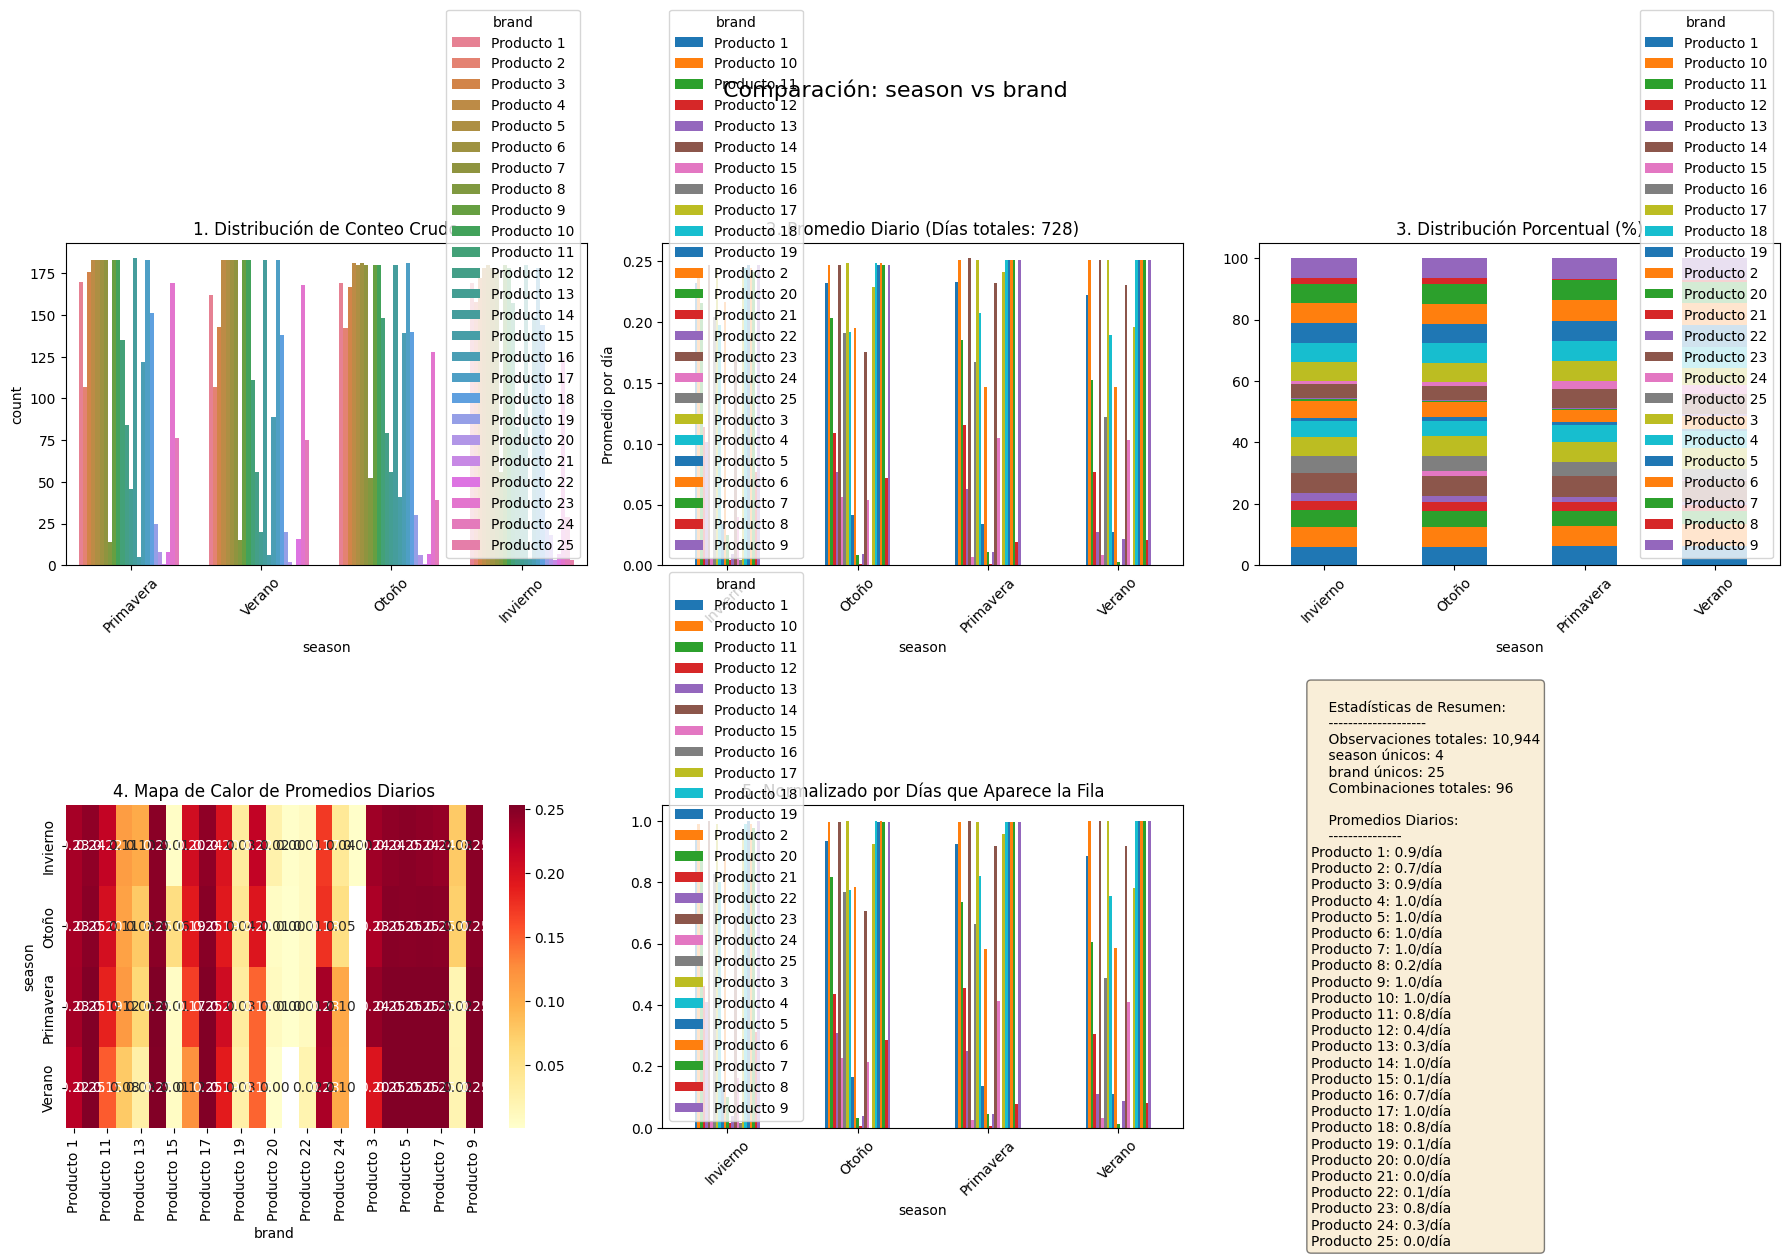

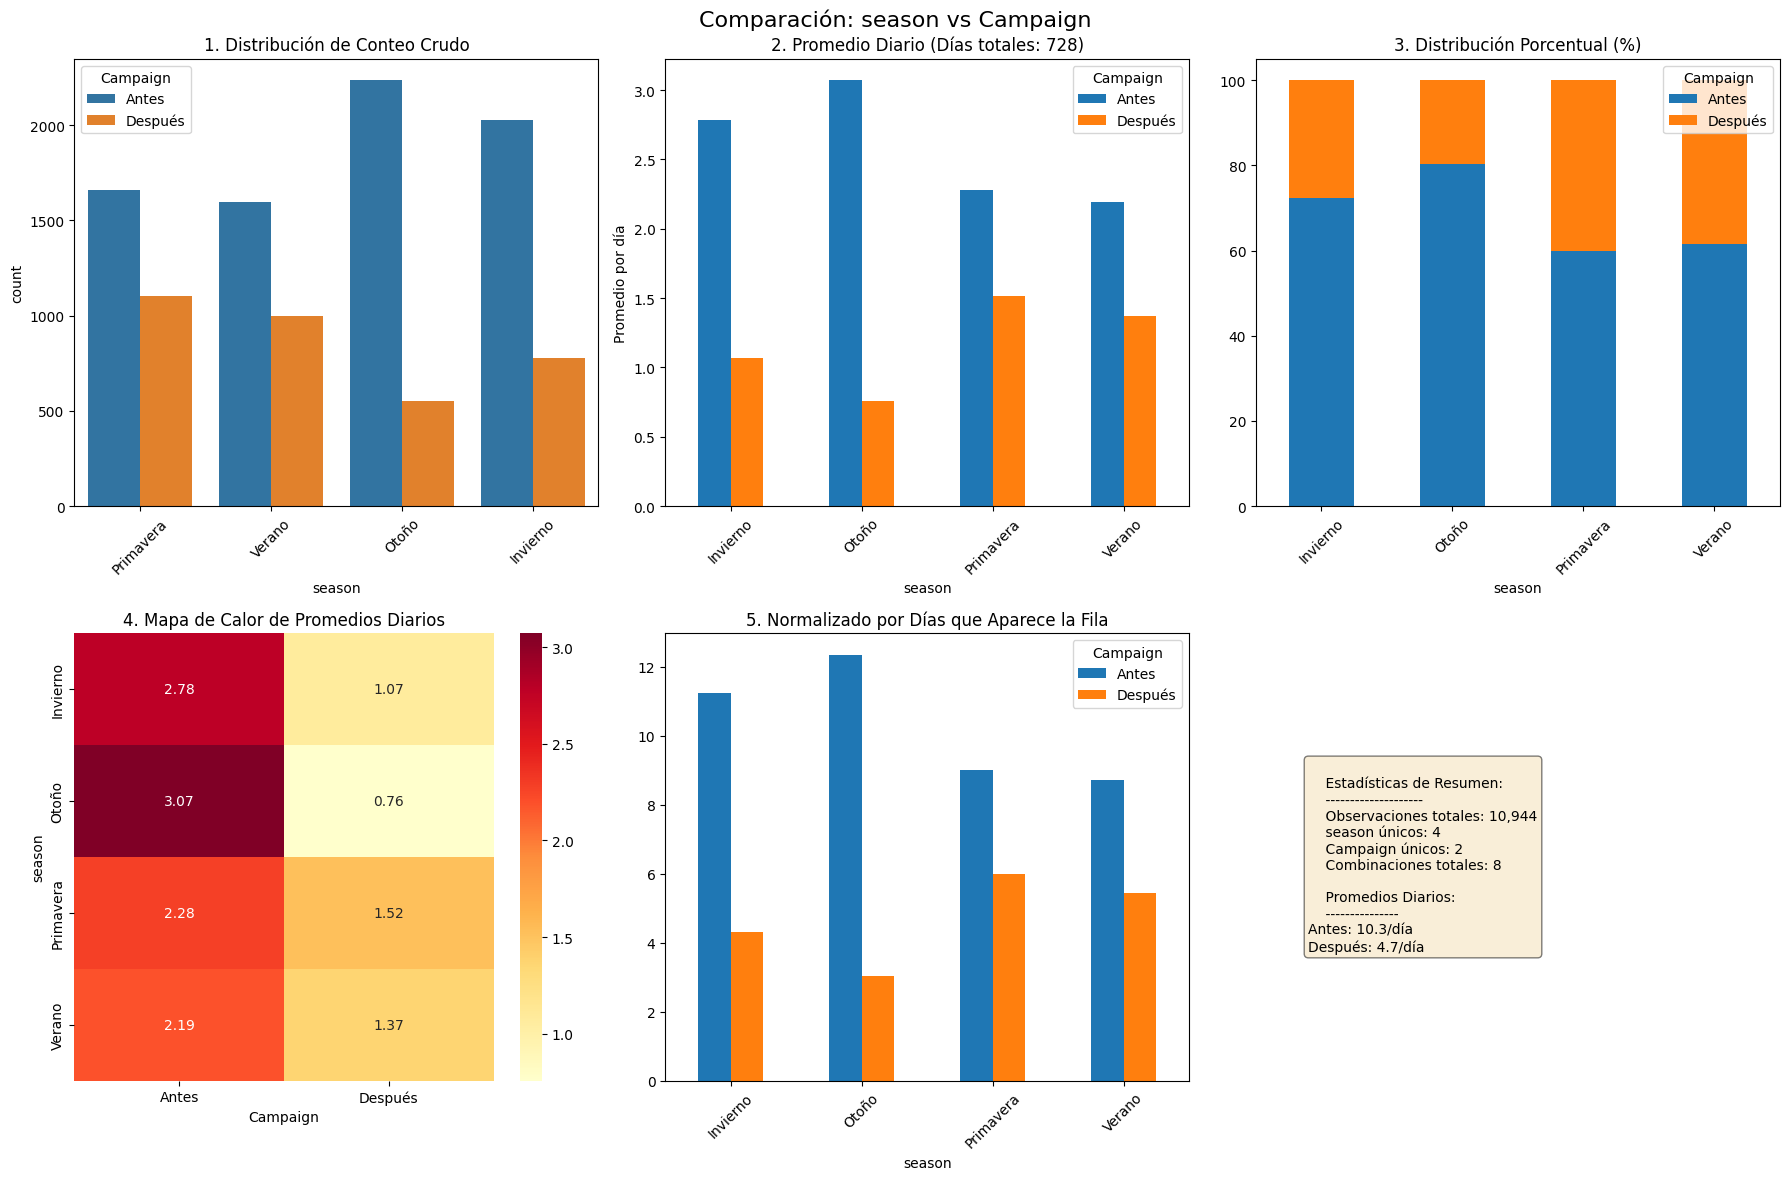

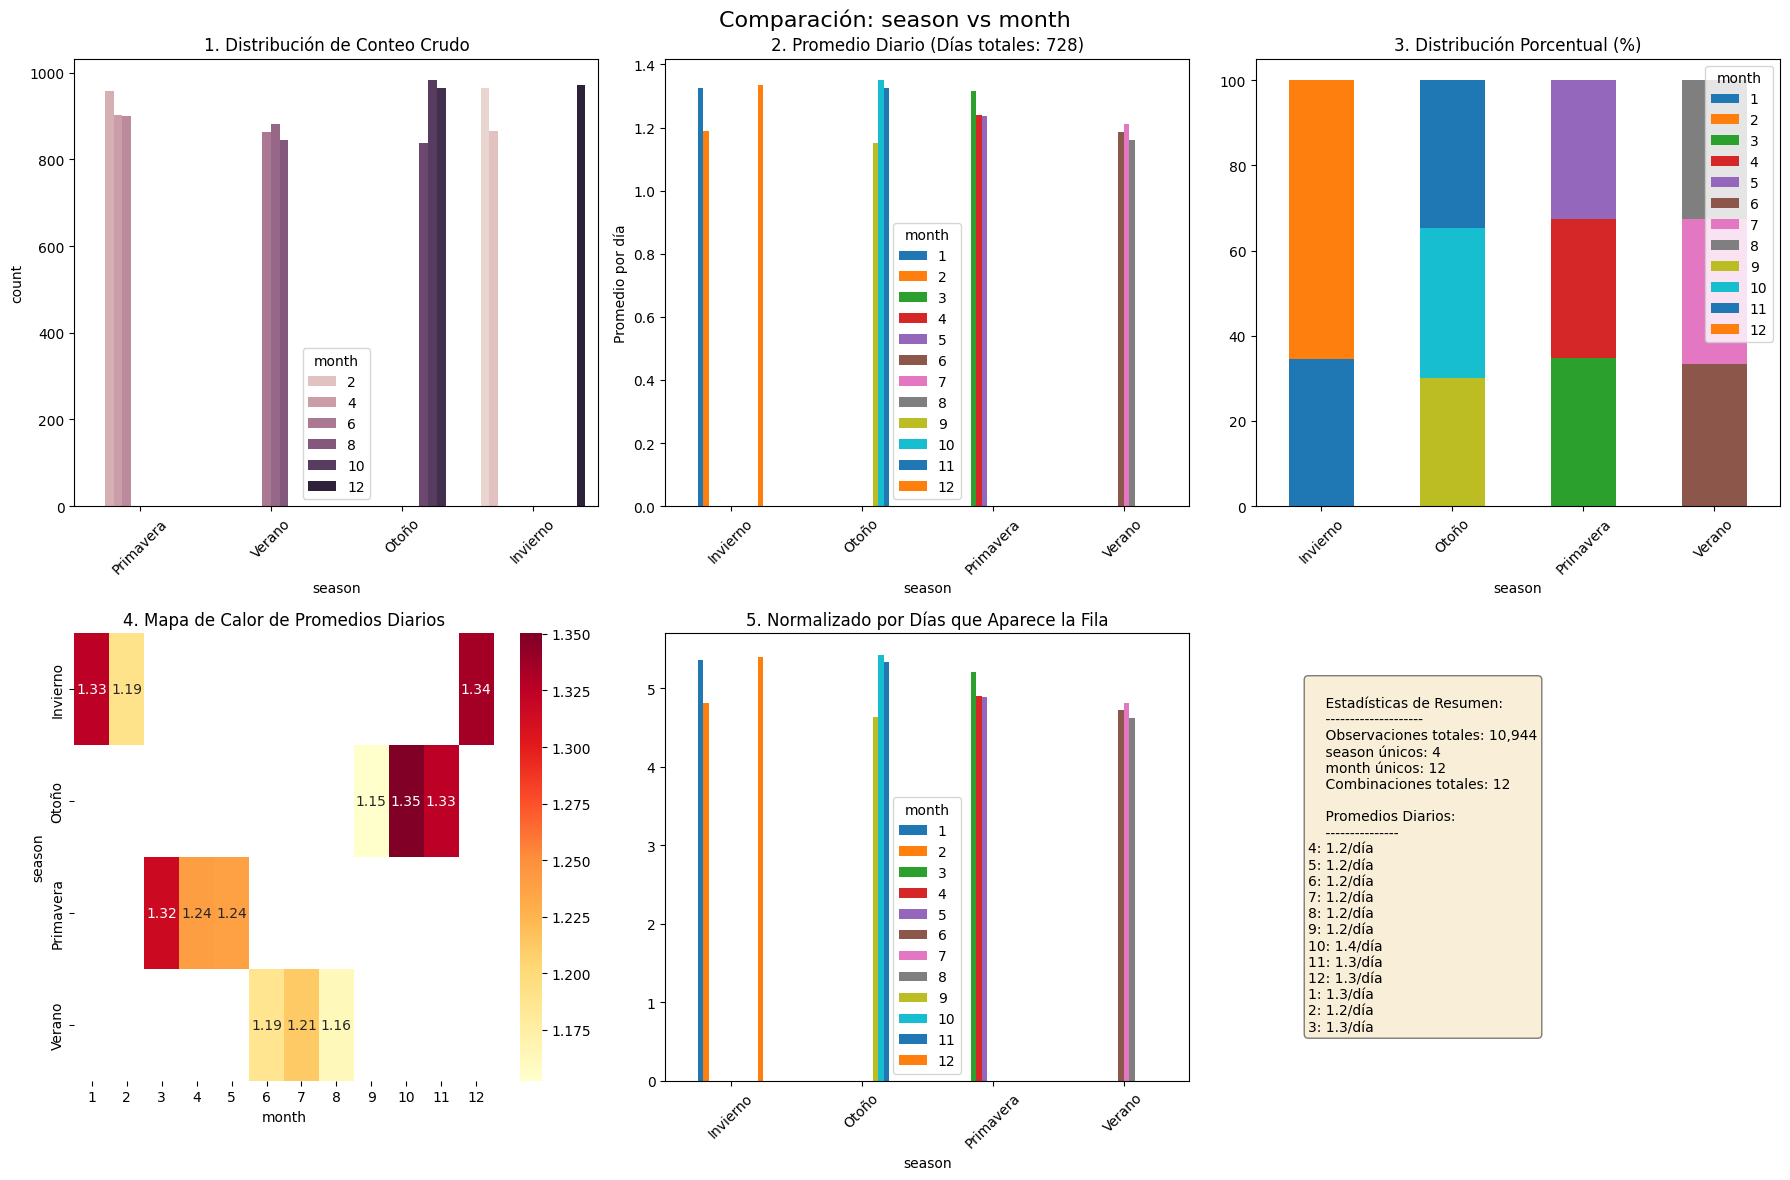

In [88]:
def crear_tablero_comparacion_categorias(df, rows, col, date_col='date'):
    """Crear un tablero comparativo completo"""
    
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Gráfico de conteo
    ax1 = plt.subplot(2, 3, 1)
    sns.countplot(data=df, x=rows, hue=col, ax=ax1)
    ax1.set_title(f'1. Distribución de Conteo Crudo')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Gráfico de promedio diario
    ax2 = plt.subplot(2, 3, 2)
    dias_totales = df[date_col].nunique()
    promedio_diario = df.groupby([rows, col]).size() / dias_totales
    promedio_diario.unstack().plot(kind='bar', ax=ax2)
    ax2.set_title(f'2. Promedio Diario (Días totales: {dias_totales})')
    ax2.set_ylabel('Promedio por día')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Distribución porcentual
    ax3 = plt.subplot(2, 3, 3)
    tabla_cruzada = pd.crosstab(df[rows], df[col], normalize='index') * 100
    tabla_cruzada.plot(kind='bar', stacked=True, ax=ax3)
    ax3.set_title('3. Distribución Porcentual (%)')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Mapa de calor de promedios diarios
    ax4 = plt.subplot(2, 3, 4)
    datos_heatmap = promedio_diario.unstack()
    sns.heatmap(datos_heatmap, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax4)
    ax4.set_title('4. Mapa de Calor de Promedios Diarios')
    
    # 5. Comparación ajustada por tiempo
    ax5 = plt.subplot(2, 3, 5)
    if rows in df.select_dtypes(include=['datetime64']).columns:

        serie_temporal = df.groupby([rows, col]).size().unstack()
        serie_temporal.plot(ax=ax5, marker='o')
        ax5.set_title('5. Distribución de Serie Temporal')
    else:

        dias_por_fila = df.groupby(rows)[date_col].nunique()
        normalizado = df.groupby([rows, col]).size() / dias_por_fila
        normalizado.unstack().plot(kind='bar', ax=ax5)
        ax5.set_title('5. Normalizado por Días que Aparece la Fila')
    ax5.tick_params(axis='x', rotation=45)
    
    # 6. Estadísticas de resumen
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    # Calcular estadísticas de resumen
    combinaciones_totales = len(df.groupby([rows, col]))
    filas_unicas = df[rows].nunique()
    columnas_unicas = df[col].nunique()
    
    texto_resumen = f"""
    Estadísticas de Resumen:
    --------------------
    Observaciones totales: {len(df):,}
    {rows} únicos: {filas_unicas}
    {col} únicos: {columnas_unicas}
    Combinaciones totales: {combinaciones_totales}
    
    Promedios Diarios:
    ---------------"""
    
    # Añadir promedios diarios por col
    for cat in df[col].unique():
        promedio_cat = len(df[df[col] == cat]) / dias_totales
        texto_resumen += f"\n{cat}: {promedio_cat:.1f}/día"
    
    ax6.text(0.1, 0.5, texto_resumen, fontsize=10, 
            verticalalignment='center', 
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.suptitle(f'Comparación: {rows} vs {col}', fontsize=16)
    plt.tight_layout()
    plt.show()

for rows in Cat_cols:
    for col in Cat_cols:
        if rows == col:
            continue
        crear_tablero_comparacion_categorias(df, rows, col)

# Hipotesis

In [89]:
df.dtypes

date           datetime64[ns]
brand                  object
sales                 float64
Campaign               object
month                   int32
season                 object
day_of_week            object
year                    int32
dtype: object

===PRUEBAS DE HIPÓTESIS PARA EL IMPACTO DE LA CAMPAÑA===
Procesando sales...
Omitiendo date: No es una columna numérica
Omitiendo day_of_week: No es una columna numérica

Resultados del Análisis de Impacto de la Campaña:

Variable  Media_Antes  Media_Despues  Porcentaje_Cambio  Correlacion_Punto_Biserial  Cohen_d Valor_P_T_Test  Significativo_T_Test
   sales      1163.47        1631.13               40.2                       0.132    0.287        0.0000*                  True

RESUMEN:
  • 1 de 1 variables muestran diferencias estadísticamente significativas (Prueba t, p < 0.05)
  • 1 de 1 variables muestran diferencias estadísticamente significativas (Mann-Whitney, p < 0.05)

VARIABLES MÁS AFECTADAS POR LA CAMPAÑA:
  sales: aumentó un 40.2% (d de Cohen = 0.287)

VISUALIZACIÓN DE RESULTADOS SIGNIFICATIVOS:


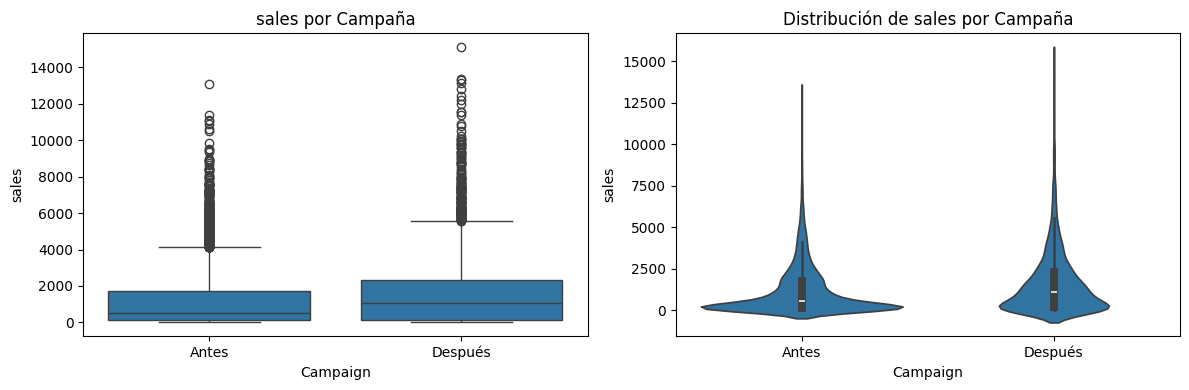

In [90]:
from scipy.stats import pointbiserialr
print("===PRUEBAS DE HIPÓTESIS PARA EL IMPACTO DE LA CAMPAÑA===")

resultados_pruebas = []

for col in Num_cols:
    if col == 'Campaign' or not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Omitiendo {col}: No es una columna numérica")
        continue
    
    print(f"Procesando {col}...")
    
    # Separar datos por Campaña 
    antes_data = df[df['Campaign'] == 'Antes'][col]
    despues_data = df[df['Campaign'] == 'Después'][col]
    
    if len(antes_data) >= 10 and len(despues_data) >= 10:
        # Calcular estadísticas básicas
        antes_mean = antes_data.mean()
        despues_mean = despues_data.mean()
        diff_media = despues_mean - antes_mean
        
        # Manejar cambio porcentual cuidadosamente
        try:
            pct_cambio = (diff_media / abs(antes_mean)) * 100 if antes_mean != 0 else np.nan
        except (TypeError, ZeroDivisionError):
            pct_cambio = np.nan
        
        # 1. Prueba t para diferencia significativa en medias
        t_stat, p_val_ttest = ttest_ind(despues_data, antes_data, equal_var=False)
        
        # 2. Prueba U de Mann-Whitney (no paramétrica)
        u_stat, p_val_mw = mannwhitneyu(despues_data, antes_data, alternative='two-sided')
        
        # 3. Tamaño del efecto d de Cohen
        n1, n2 = len(antes_data), len(despues_data)
        if n1 > 1 and n2 > 1:  
            var1 = antes_data.var()
            var2 = despues_data.var()
            sd_pooled = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
            cohens_d = diff_media / sd_pooled if sd_pooled != 0 else np.nan
        else:
            cohens_d = np.nan
        
        # Correlación punto-biserial
        try:
            datos_combinados = df[[col, 'Campaign']].dropna()
            datos_combinados['Campaign_numeric'] = datos_combinados['Campaign'].map({'Antes': 0, 'Después': 1})
            pb_corr, pb_pval = pointbiserialr(datos_combinados[col], datos_combinados['Campaign_numeric'])
        except:
            pb_corr, pb_pval = np.nan, np.nan
        
        resultados_pruebas.append({
            'Variable': col,
            'Media_Antes': antes_mean,
            'Media_Despues': despues_mean,
            'Diferencia_Media': diff_media,
            'Porcentaje_Cambio': pct_cambio,
            'Valor_P_T_Test': p_val_ttest,
            'Valor_P_MW': p_val_mw,
            'Correlacion_Punto_Biserial': pb_corr,
            'Cohen_d': cohens_d,
            'Significativo_T_Test': p_val_ttest < 0.05,
            'Significativo_MW': p_val_mw < 0.05
        })
    else:
        print(f"Omitiendo {col}: Datos insuficientes (Antes: {len(antes_data)}, Después: {len(despues_data)})")

if resultados_pruebas:
    resultados_df = pd.DataFrame(resultados_pruebas)
    
    # Ordenar por tamaño de efecto absoluto (d de Cohen)
    resultados_df['Tamaño_Efecto_Abs'] = resultados_df['Cohen_d'].abs()
    resultados_df = resultados_df.sort_values('Tamaño_Efecto_Abs', ascending=False)
    
    print(f"\nResultados del Análisis de Impacto de la Campaña:\n")
    
    # Formatear para mejor visualización
    columnas_mostrar = ['Variable', 'Media_Antes', 'Media_Despues', 'Porcentaje_Cambio', 
                        'Correlacion_Punto_Biserial', 'Cohen_d', 'Valor_P_T_Test', 'Significativo_T_Test']
    
    mostrar_df = resultados_df[columnas_mostrar].round({
        'Media_Antes': 2,
        'Media_Despues': 2,
        'Porcentaje_Cambio': 1,
        'Correlacion_Punto_Biserial': 3,
        'Cohen_d': 3,
        'Valor_P_T_Test': 4
    })
    
    def agregar_simbolo_sig(p_val, sig):
        if sig:
            return f"{p_val:.4f}*"
        return f"{p_val:.4f}"
    
    mostrar_df['Valor_P_T_Test'] = [agregar_simbolo_sig(p, s) for p, s in 
                                     zip(resultados_df['Valor_P_T_Test'], resultados_df['Significativo_T_Test'])]
    
    print(mostrar_df.to_string(index=False))
    
    # Estadísticas de resumen
    n_significativo_ttest = resultados_df['Significativo_T_Test'].sum()
    n_significativo_mw = resultados_df['Significativo_MW'].sum()
    
    print(f"\nRESUMEN:")
    print(f"  • {n_significativo_ttest} de {len(resultados_df)} variables muestran diferencias estadísticamente significativas (Prueba t, p < 0.05)")
    print(f"  • {n_significativo_mw} de {len(resultados_df)} variables muestran diferencias estadísticamente significativas (Mann-Whitney, p < 0.05)")
    
    # Top 3 variables más afectadas
    print(f"\nVARIABLES MÁS AFECTADAS POR LA CAMPAÑA:")
    top_3 = resultados_df.head(3)
    for i, fila in top_3.iterrows():
        if pd.notna(fila['Porcentaje_Cambio']):
            direccion = "aumentó" if fila['Porcentaje_Cambio'] > 0 else "disminuyó"
            print(f"  {fila['Variable']}: {direccion} un {abs(fila['Porcentaje_Cambio']):.1f}% (d de Cohen = {fila['Cohen_d']:.3f})")
        else:
            print(f"  {fila['Variable']}: d de Cohen = {fila['Cohen_d']:.3f} (cambio porcentual no aplicable)")
    
    # Visualización de resultados significativos
    print(f"\nVISUALIZACIÓN DE RESULTADOS SIGNIFICATIVOS:")
    
    variables_significativas = resultados_df[resultados_df['Significativo_T_Test']]['Variable'].tolist()
    
    if variables_significativas:
        fig, axes = plt.subplots(len(variables_significativas), 2, figsize=(12, 4*len(variables_significativas)))
        if len(variables_significativas) == 1:
            axes = axes.reshape(1, -1)
        
        for idx, var in enumerate(variables_significativas):
            # Boxplot
            sns.boxplot(data=df, x='Campaign', y=var, ax=axes[idx, 0])
            axes[idx, 0].set_title(f'{var} por Campaña')
            axes[idx, 0].set_ylabel(var)
            
            # Violin plot
            sns.violinplot(data=df, x='Campaign', y=var, ax=axes[idx, 1])
            axes[idx, 1].set_title(f'Distribución de {var} por Campaña')
            axes[idx, 1].set_ylabel(var)
        
        plt.tight_layout()
        plt.show()
    else:
        print("  No hay resultados estadísticamente significativos para visualizar")
    
else:
    print("No se pudieron realizar pruebas de hipótesis")